# 프로젝트 : 주식 예측에 도전해 보자

- 실제 주식값 예측에 도전해 보자.
- 데이터는 과거의 일자별 시세
- 휴대폰 APU 스냅드래곤(SNAPDRAGON) 시리즈로 유명한 퀄컴(QUALCOMM)에 대한 주식 시세를 예측해 보자.

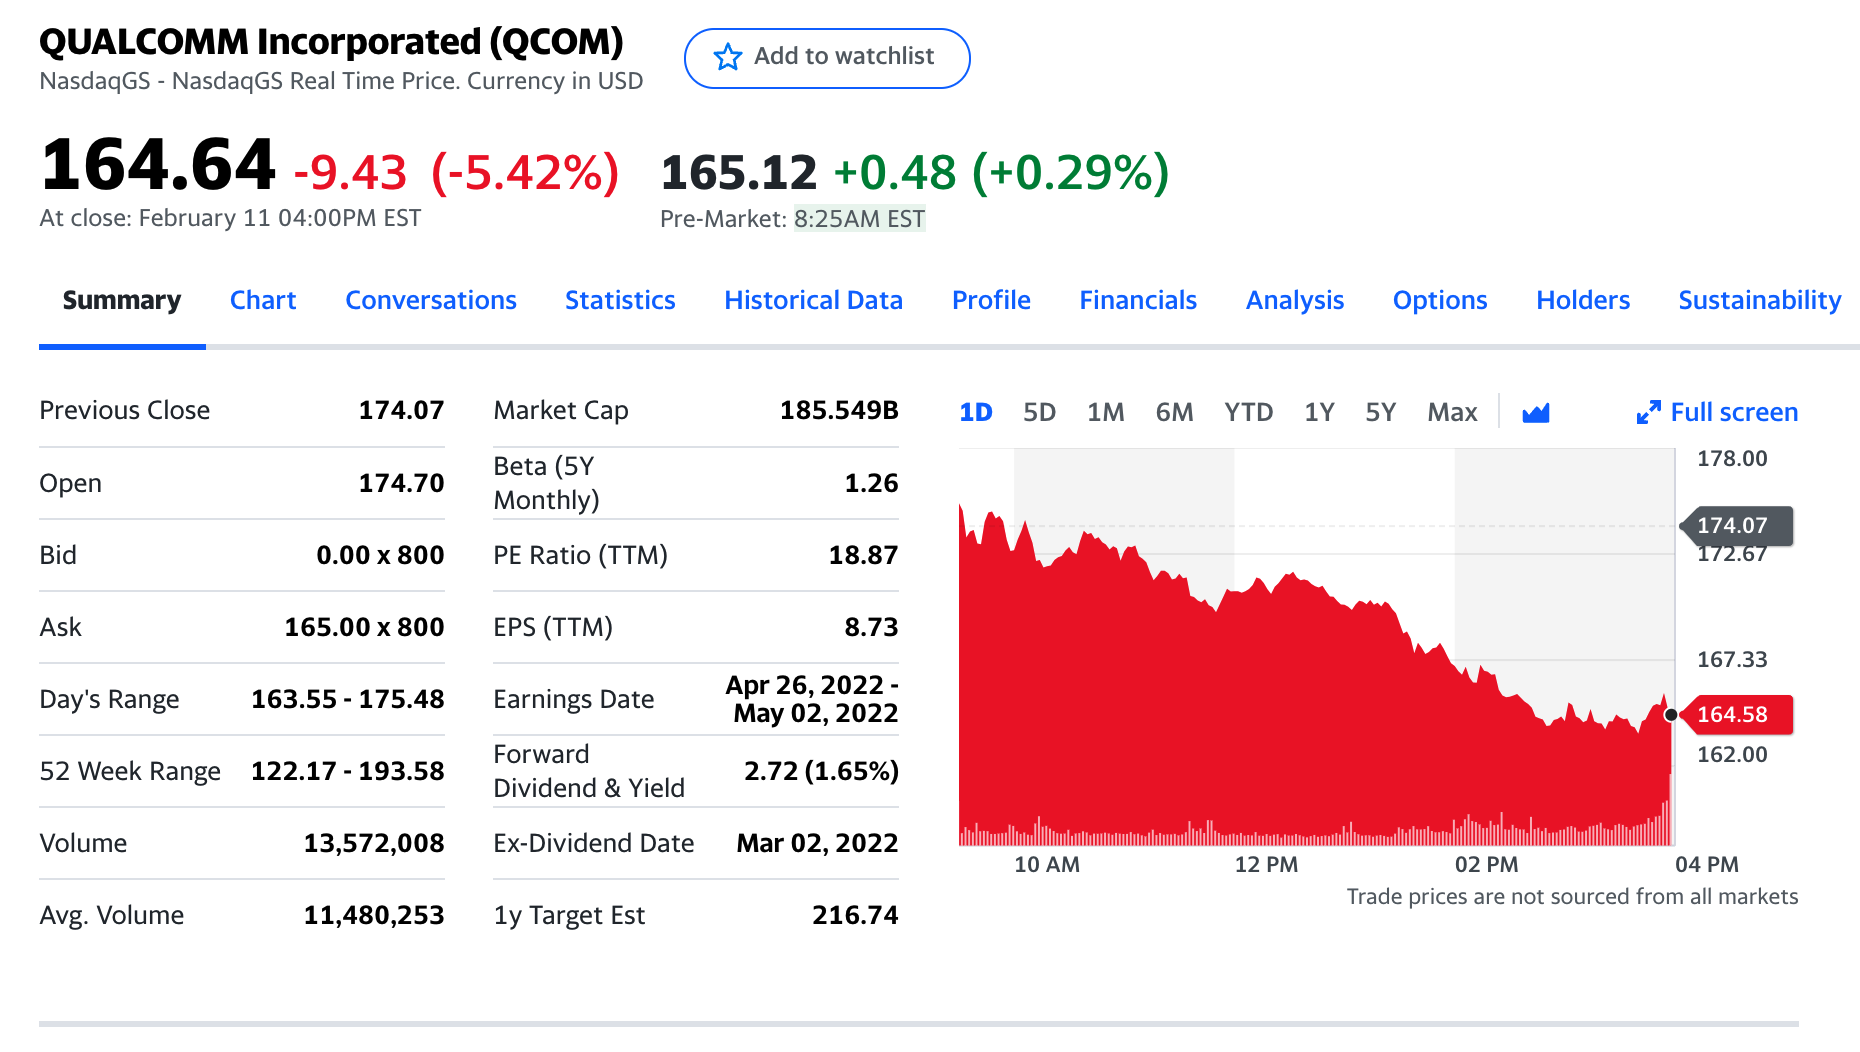

- 위 그림과 같이 [Yahoo Finance](https://finance.yahoo.com/)에서 오늘 사용할 데이터셋을 다운로드


- 작업할 파일 경로 구성은 아래와 같다.

```
$ mkdir -p ~/aiffel/stock_prediction/data
$ ln -s ~/data/* ~/aiffel/stock_prediction/data
```

## 1. 들어가며

- 시계열 예측(Time-Series Prediction)을 다루는 여러 가지 통계적 기법 중에 가장 널리 알려진
- ARIMA(Auto-regressive Integrated Moving Average)에 대해 알아보고 주식 종목의 가격을 예측해 보자.


- 시계열 예측에 사용되는 다양한 모델
    - ARIMA
    - Prophet(페이스북에서 발표)
    - LSTM 등 딥러닝을 활용하는 방법
    
    
- 탄탄한 통계학 이론적 기반의 ARIMA 모델을 사용해 보자.


## 2. [시계열 분석이란?](https://namu.wiki/w/%EC%8B%9C%EA%B3%84%EC%97%B4%20%EB%B6%84%EC%84%9D)

### 2-1. 개요
- 시계열(시간의 흐름에 따라 기록된 것) 자료(data)를 분석하고 여러 변수들간의 인과관계를 분석하는 방법론
- 공대의 신호처리(signal processing)와도 관계가 깊다.
- 경제학에서도 매우 많이 쓰이는 방법론
- 계량경제학, 금융, 거시경제 분석 등에 사용

    #### ARIMA 시계열 예측

    - 시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?
    - ARIMA 모델의 개념
    - ARIMA 모델 훈련과 추론



### 2-2. 시계열 예측이란?

- 아래와 같은 미래 예측 시나리오를 생각해보자.
    - 지금까지의 주가 변화를 바탕으로 다음 주가 변동 예측
    - 특정 지역의 기후데이터를 바탕으로 내일의 온도 변화 예측
    - 공장 센터 데이터 변화 이력을 토대로 이상 발생 예측


- 위 예시의 공통점
    - 예측의 근거가 되는 시계열(Time-Series) 데이터가 있다는 것
    - 시계열이란 시간 순서대로 발생한 데이터의 수열이라는 뜻
   
   
- 일정 시간 간격으로 발생한 데이터일 때가 많지만 꼭 그래야만 하는 것은 아니다.
- 매일의 주식 거래 가격을 날짜-가격 형태로 날짜순으로 모아둔 데이터가 있다면 훌륭한 시계열 데이터가 될 것이다.
- 이때 날짜가 인덱스(index) 역할을 하게 된다.


- 미래 예측은 불가능한 것
- 그럼에도 미래의 데이터를 예측하려 한다면 
- 다음 **두 가지의 전제가 필요**

> 1. 과거의 데이터에 일정한 패턴이 발견된다.
2. 과거의 패턴은 미래에도 동일하게 반복될 것이다.

- 위 두 가지 전제를 한 문장으로 줄이면 다음과 같습니다.

>안정적(Stationary) 데이터에 대해서만 미래 예측이 가능하다.

- **안정적(Stationary)이다**는 것은 **시계열 데이터의 통계적 특성이 변하지 않는다**는 뜻

### 2-3. Stationary한 시계열 데이터

- 안정적인 시계열에서 시간의 추이와 관계없이 일정해야 하는 통계적 특성 세 가지
    1. 평균 : 분포의 중간부분을 알아낸다.
    2. 분산 : 분포가 얼마나 퍼져있는지 알아낸다.
    3. 자기공분산(autocovariance) : 서로 다른 2개의 시간에 대한 변수 값의 공분산을 계산하는 것


### 2-4. 낯선 통개학 개념 정리

#### 2-4-1. 평균(Average)

- 자료 집합내의 모든 값을 더하여 자료의 개수로 나눈 것


- 확룔론에서는 기댓값이라고도 말한다.
    - 어떤 확률적 사건에 대한 평균의 의미
    
    
- 통계학에서는 표본 평균의 개념도 있다.
    - 표본 평균 : 모집단에서 표본을 추출하여 그 표본들의 평균을 구하고 그 집단을 대표하는 값을 말한다.
    

#### 2-4-2. 분산(Variance)

- 관측값에서 평균을 뺀 값을 제곱하여 모두 더한 값에 전체 개수로 나눠서 구한 값
- 즉, 차이값의 제곱의 평균


#### 2-4-3. 공분산(Covariance)

- 2개의 확률변수의 선형 관계를 나타내는 값(각 확률변수들이 어떻게 퍼져있는지를 나타내는 것)
- 즉, X가 커지면 Y도 커지거나 혹은 작아지거나 아니면 별 상관 없거나 등을 나타내어 주는 것
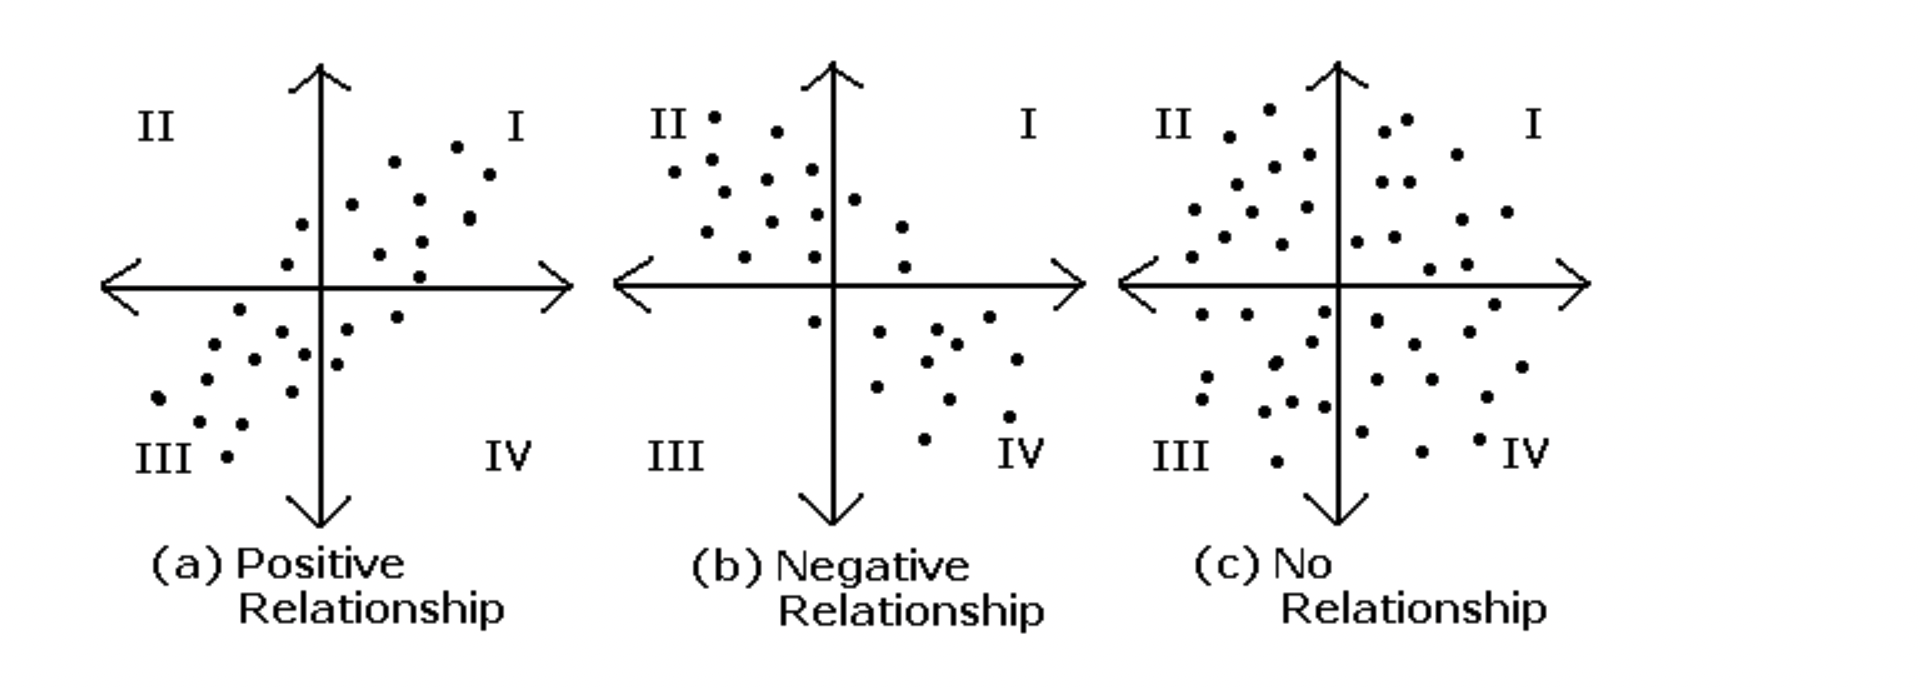

- 동일한 시간에서 2개 변수의 상관관계를 분석하는 것을 의미

#### 2-4-4. 상관계수(Correlation)

- 상관관계 분석에서 두 변수 간의 선형 관계의 정도를 수량화하는 측도
- 즉, 두 변수 $X$, $Y$ 사이의 상관관계 정도를 나타내는 수치
- 피어슨(Karl Pearson)에 의해 제안되었기에 피어슨 상관계수라고도 한다.
    - +1과 -1 사이의 값
    - +1은 완벽한 양의 선형 상관 관계
    - 0 은 선형 상관 관계 없음
    - -1은 완벽한 음의 선형 상관 관계
    
    
#### 2-4-5. 자기공분산(Autocovariance)
- 서로 다른 2개의 시간에 대한 변수 값의 공분산을 계산하는 것
- 이것 때문에 2-3.의 시계열 데이터에서 시간의 추이와 상관없이 일정해야 하는 것이 공분산이 아니었다.
- 자기공분산 함수를 시간에 따른 값들의 상관관계가 어떻게 되는지 파악할 수 있기에
- 시계열 데이터의 추세와 크기를 파악하는데 용이하게 활용된다.


#### 2-4-6. 자기상관계수(Autocorrelation)

- 동일한 변수($Y_t, Y_{t-1}, Y_{t-2}, ...$)의 서로 다른 시간 차이(time lag)를 두고 관계를 분석하는 것
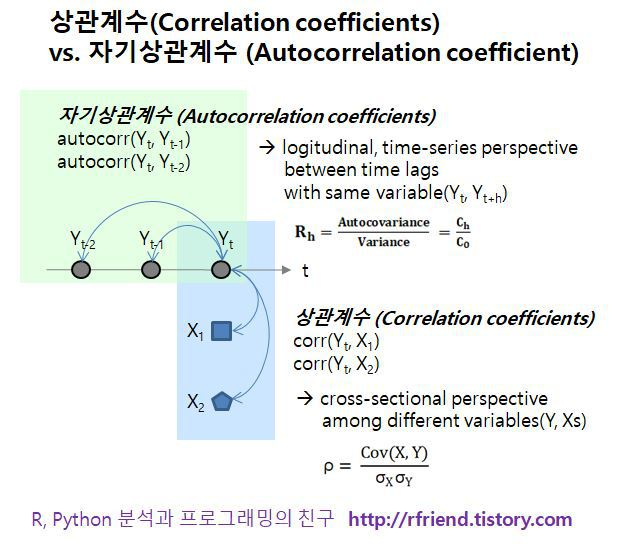


- 즉, 상관계수가 두 변수 사이의 선형 관계의 크기를 측정하는 것처럼, 자기상관계수는 시계열의 시차 값 사이의 선형 관계를 측정

<br>

### STEP 1 : 시계열 데이터 준비
___

- 칼럼 종류 : Date, Open, High, Low, Close, Adj Close, Volume
- 날짜별    : 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)
- 종가(Close)만 사용
    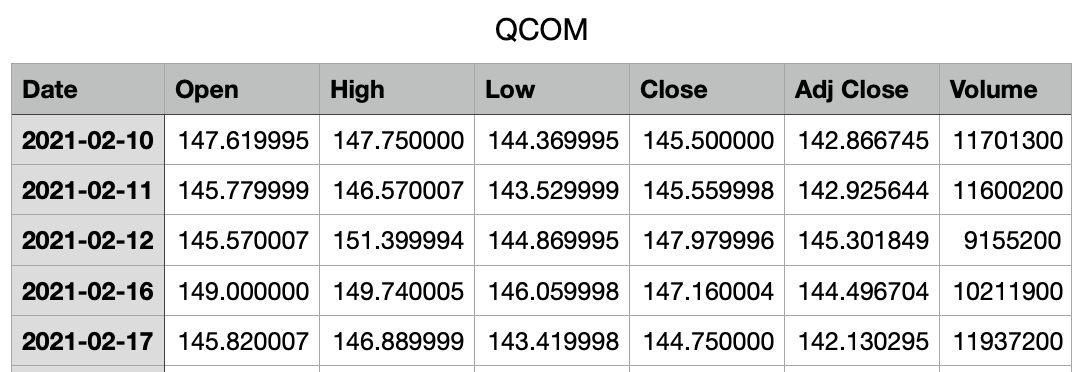


#### 시계열(Time Series) 생성

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Time Series 생성
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/QCOM.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2021-02-10    145.500000
2021-02-11    145.559998
2021-02-12    147.979996
2021-02-16    147.160004
2021-02-17    144.750000
Name: Close, dtype: float64

- 이제 시계열이 준비되었으니 시각화를 확인해 보자.

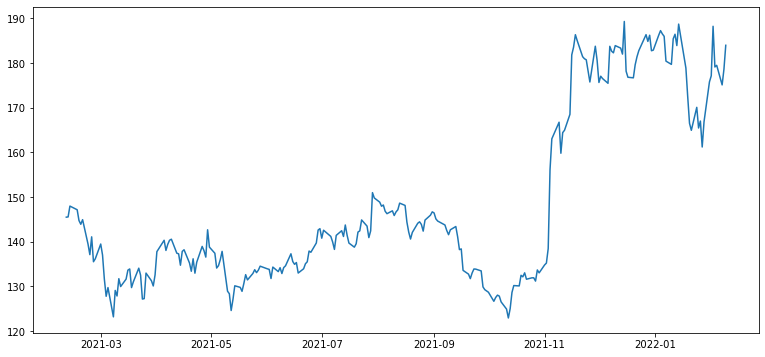

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts)

### STEP 2 : 각종 전처리 수행
___

- 결측치 처리
- 로그 변환

In [3]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력

Series([], Name: Close, dtype: float64)

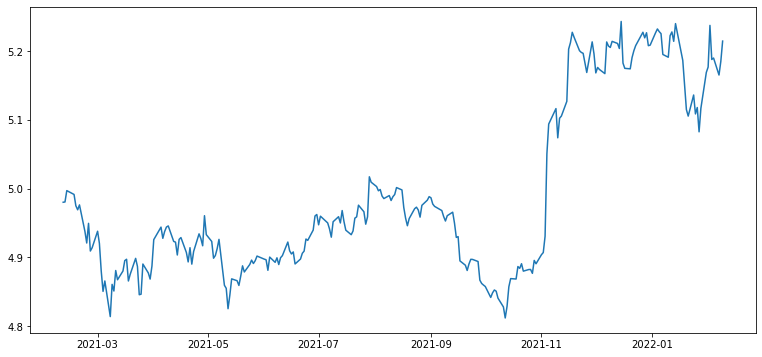

In [4]:
# 로그 변환
ts_log = np.log(ts)
plt.plot(ts_log)

### STEP 3 : 시계열 안정성 분석
___

- 정성적 그래프 분석
- 정량적 Augmented Dicky-Fuller Test
- 시계열 분해(Time Series Decomposition)
- Residual 안정성 확인

- 아래는 일정 시간 내 `구간 통계치(Rolling Statistics)`를 시각화해 보는 함수
- `현재 타임 스텝` 부터 `window에 주어진 타임 스텝` 사이  
    - 구간의 평균(rolling mean, **`이동평균`**)과  
    - 표준편차(rolling std, **`이동표준편차`**)를  
    
- 원본 시계열과 함께 **시각화**해 보면 좀 더 뚜렷한 경향성을 확인할 수 있다.


- [이동평균이란?](https://www.econowide.com/3544)
    - 수의 집합에서 특정 크기의 부분 집합을 연속적으로 이동하면 산출한 평균
    - 이동평균(MA, Moving Average) 계산법을 이용해 산출된 이동평균선은 가격, 지수 등의 
    - 수치 변화 관찰, 분석하는데 값의 전반적인 변화 흐름(추세) 파악을 용이하게 해준다.
    - 이동평균선은 주식, 선물, 옵션 등 투자 분야에서 기술적분석 도구로 사용된다.
    

In [5]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


- 정성적 그래프 분석

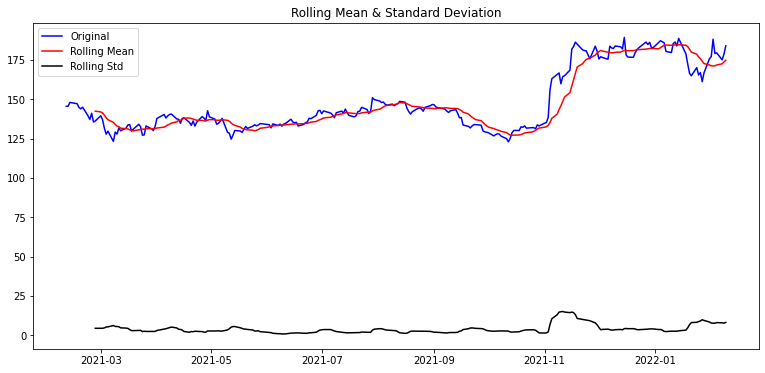

In [6]:
plot_rolling_statistics(ts, window=12)

- 정량적 Augmented Dicky-Fuller Test
    - ADF test : 시계열 데이터의 안정성(stationary)을 테스트하는 통계적 방법

>1. **주어진 시계열 데이터가 안정적이지 않다**라는 **귀무가설(Null Hypothesis)**를 세운 후,
2. 통계적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에
3. **이 시계열 데이터가 안정적이다**라는 **대립가설(Alternative Hypothesis)을 채택**한다

    는 내용.

###  p-value(유의확률)의 의미

- p-value의 정의는 귀무가설을 가정했을 때의 확률분포 상에서 현재의 관측보다 더 극단적인 관측이 나올 확률
- 귀무가설의 가정이 틀렸다고 볼 수 있는 확률이기도 하다.
- 이 값이 0.05 미만으로 매우 낮게 나온다면
- p-value 만큼의 오류 가능성 하에 귀무가설을 기각하고 대립가설을 채택할 수 있는 근거가 된다.


### statsmodels 패키지와 adfuller 메서드

- statsmodels 패키지는 통계검정, 시계열분석 등을 이용할 수 있는 강력한 통계 패키지

- 아래는 **주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드**


In [7]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


- 시계열(Time Series)에 대한 Augmented Dickey-Fuller Test를 수행해 보자.

In [8]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -0.786060
p-value                          0.823183
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


- **p-value가 0.82로 거의 1에 가깝게 나타났다.**

- `ts(퀄컴 주식 시세 데이터) 시계열이 안정적이지 않다`는
- 귀무가설(주어진 시계열 데이터가 안정적이지 않다.)이 옳다는 증거는 아니지만
- **이 귀무가설을 기각할 수는 없기에** `이 시계열이 안정적인 시계열`이라고 말할 수는 없다.


- 안정적인 시계열로 만들기 위해 **Moving average 제거**를 해보자.

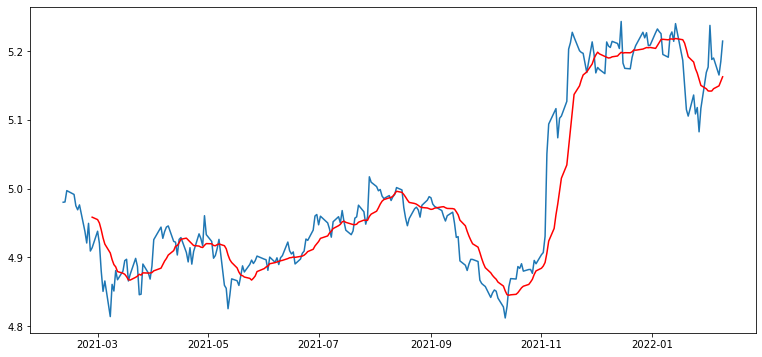

In [9]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [10]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Date
2021-02-10         NaN
2021-02-11         NaN
2021-02-12         NaN
2021-02-16         NaN
2021-02-17         NaN
2021-02-18         NaN
2021-02-19         NaN
2021-02-22         NaN
2021-02-23         NaN
2021-02-24         NaN
2021-02-25         NaN
2021-02-26   -0.044384
2021-03-01   -0.016927
2021-03-02   -0.029621
2021-03-03   -0.059933
Name: Close, dtype: float64

- Moving Average 계산 시 (windows size=12인 경우) 앞의 11개의 데이터는 MA가 계산되지 않아  
- `ts_log_moving_avg`에 결측치(NaN)가 발생했다.  
- 향후 Dicky-Fuller Test 시에 에러 발생요인으로 데이터셋에서 제거해 주자.

In [11]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2021-02-26   -0.044384
2021-03-01   -0.016927
2021-03-02   -0.029621
2021-03-03   -0.059933
2021-03-04   -0.077935
2021-03-05   -0.053675
2021-03-08   -0.092528
2021-03-09   -0.036034
2021-03-10   -0.038454
2021-03-11   -0.005303
2021-03-12   -0.011912
2021-03-15    0.003205
2021-03-16    0.019928
2021-03-17    0.025342
2021-03-18   -0.001736
Name: Close, dtype: float64

- ts_log_moving_avg를 정성, 정량적으로 다시 분석해보자.

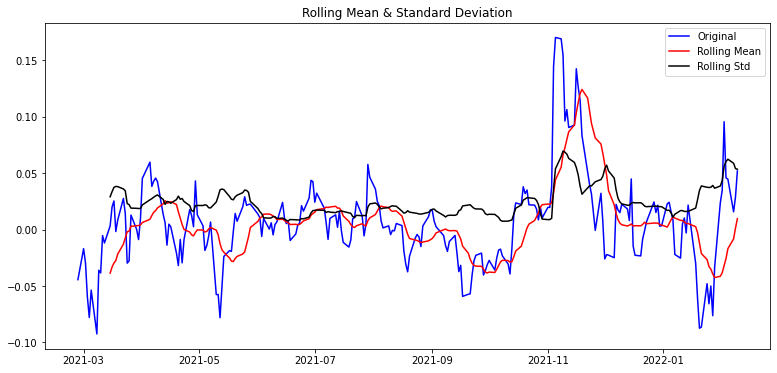

In [12]:
plot_rolling_statistics(ts_log_moving_avg)

In [13]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -4.162882
p-value                          0.000761
#Lags Used                       0.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


- p-value가 0.0008 수준이 되었다. 99% 이상의 confidence로 stationary 하다고 할 수 있다.


- 시계열 분해(Time Series Decomposition)
    - statsmodels 라이브러리 안에 `seasonal_decompose` 메서드를 통해 시계열 안에 존재하는 
    - trend, seasonality를 직접 분리해 낼 수 있다.
    - 이것을 활용하여 앞에서 수행했던 moving average 제거, differencing 등을 거치지 않고 안정적인 시계열을 분리보자.

In [14]:
# Time Series 생성
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/QCOM.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2021-02-10    145.500000
2021-02-11    145.559998
2021-02-12    147.979996
2021-02-16    147.160004
2021-02-17    144.750000
Name: Close, dtype: float64

In [15]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력

Series([], Name: Close, dtype: float64)

In [16]:
# 로그 변환
ts_log = np.log(ts)

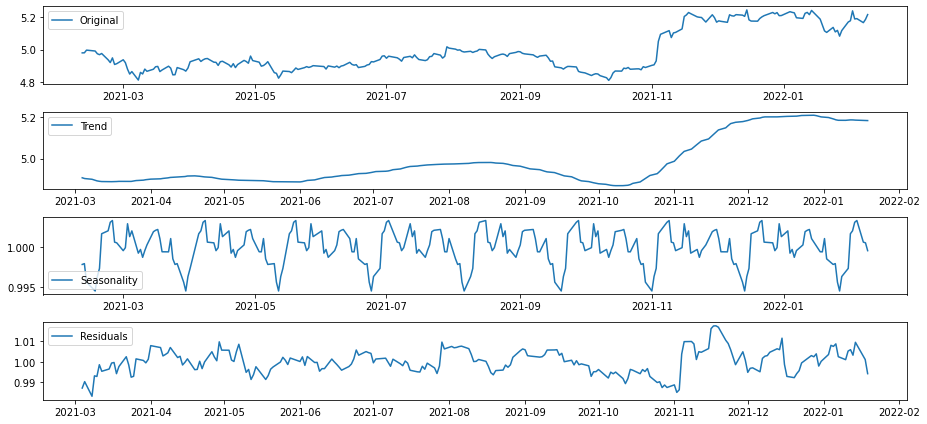

In [17]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend         # 추세(시간 추이에 따라 나타나는 평균값 변화)
seasonal = decomposition.seasonal   # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid      # 원본(로그변환한) - 추세 - 계절성

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- `Original` 시계열에서 `Trend`와 `Seasonality`를 제거하고 난 나머지를 `Residual`이라고 한다.

- 이제 `Residual`에 대해 안정성 여부를 확인해 보자.

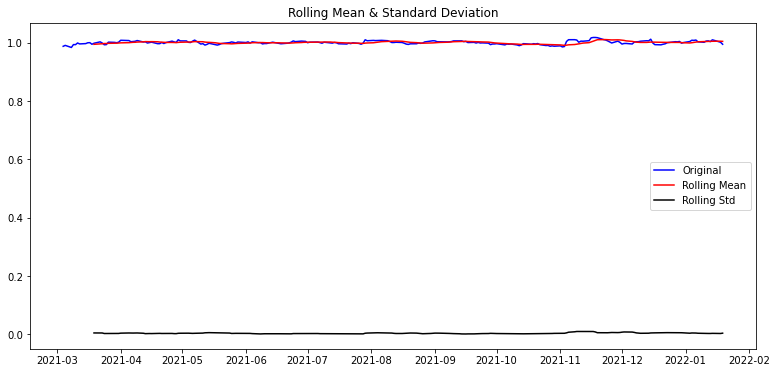

In [18]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [19]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.277565
p-value                          0.000006
#Lags Used                       0.000000
Number of Observations Used    222.000000
Critical Value (1%)             -3.460154
Critical Value (5%)             -2.874649
Critical Value (10%)            -2.573757
dtype: float64


- `Residual`은 압도적으로 낮은 `p-value`를 보여준다.
- 확실히 예측 가능한 수준의 안정적인 시계열이 얻어졌다고 볼 수 있다.

### STEP 4 : 학습, 테스트 데이터셋 생성
___

- 학습, 테스트 데이터셋 분리

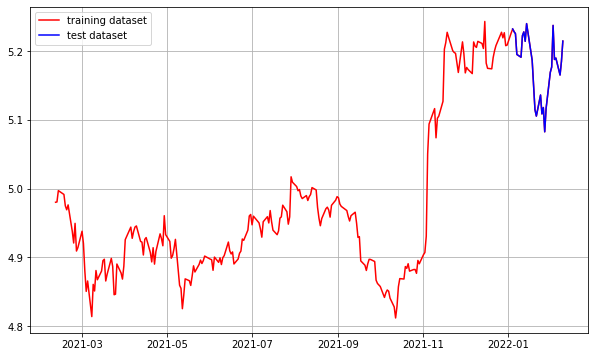

In [20]:
# train_data, test_data
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
# train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(ts_log, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### STEP 5 : 적정 ARIMA 모수 찾기
___

- ACF, PACF 그려보기 -> p,q 구하기
- 차분 안정성 확인 -> d 구하기

- `ARIMA(Autoregressive Integrated Moving Average)`를 사용하면  
- `Trend + Seasonality + Residual`을 한 것과 같은 시계열 데이터 예측 모델을 자동으로 만들 수 있다.
- 아래 3가지 모델을 한꺼번에 고려한다.
    - AR(자기회귀, Autoregressive) : 과거 값들에 대한 회귀로 미래 값을 예측하는 방법
        - 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점의 모델
    - MA(이동평균, Moving Average) : 시계열의 Trend에 해당하는 부분을 모델링
        - 주식값이 최근의 증감 패턴을 지속할 것이라고 보는 관점의 모델
    - I(차분 누적, Integration)
        - $Y_t$가 이전 데이터와 $d$차 차분의 누적(integration) 합으로 보는 모델


/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


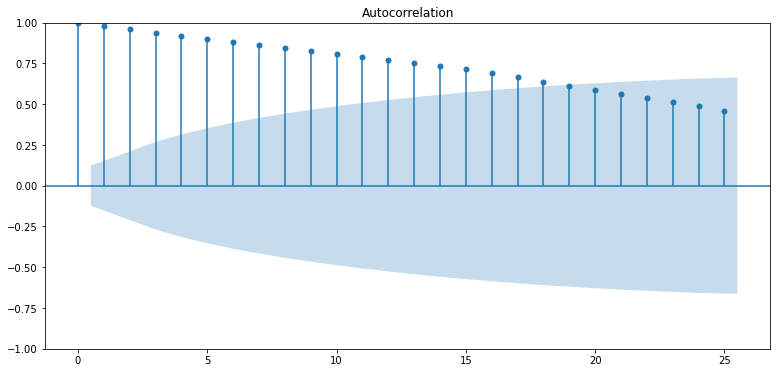

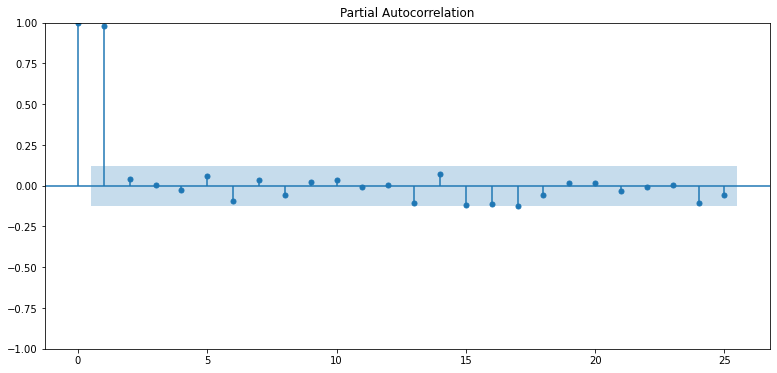

In [21]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

- p가 2 이상인 구간에서 PACF는 거의 0에 가까워지고 있기 때문에 p=1이 매우 적합한 것 같다.
- PACF가 0이라는 것은 현재 데이터와 p 시점 떨어진 이전의 데이터는 상관도가 0으로
- 즉, 아무 상관 없는 데이터이기에 고려할 필요가 없다는 뜻이다.
- q에 대해서는 적합한 값이 없어 보이기에 q=0으로 두자.

Results of Dickey-Fuller Test:
Test Statistic                -1.590484e+01
p-value                        8.249858e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64


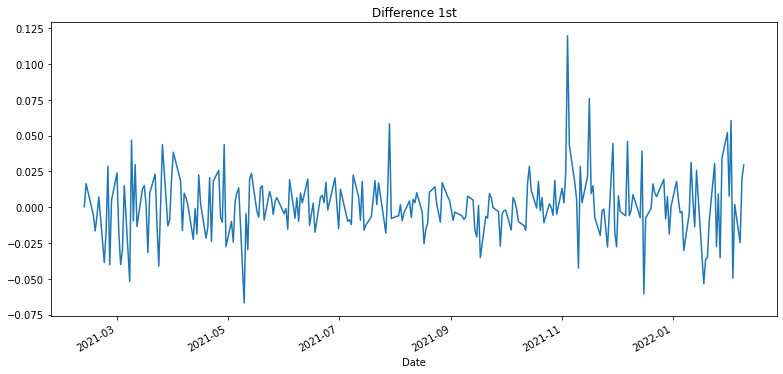

In [22]:
# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -7.469488e+00
p-value                        5.099420e-11
#Lags Used                     1.300000e+01
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64


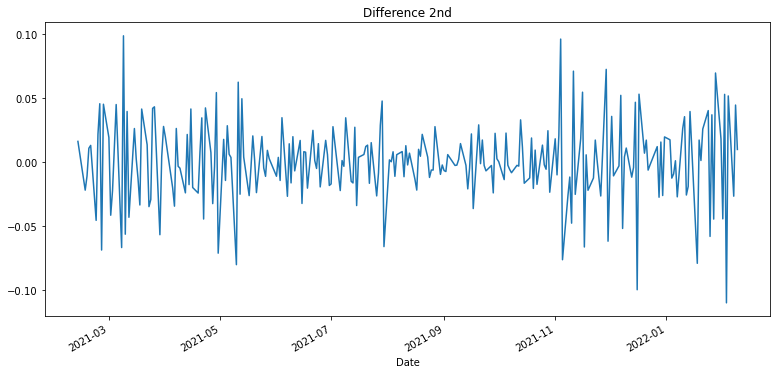

In [23]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

- 1차, 2차 차분을 구했을 때 애매한 수준의 안정화 상태를 보이는 것으로 판단되었다.
- 2차 차분이 좀 더 안정화된 것으로 보였지만 1차 차분 이전의 **p-value** 값도 충분히 안정적 시계열로 판단되었기에
- `d=0`로 먼저 시도해 보고 `d` 값을 변경하면서 최적의 값을 찾아보자.

### STEP 6 : ARIMA 모델 훈련과 테스트
___

- ARIMA 모델 빌드와 훈련
- 모델 테스트 및 플로팅
- 최종 예측 모델 정확도 측정(MAPE)

- `p=1`, `d=0`, `q=0` 로 해보자.

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 0, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 556.933
Date:                Thu, 17 Feb 2022   AIC                          -1107.865
Time:                        20:37:36   BIC                          -1097.591
Sample:                             0   HQIC                         -1103.719
                                - 227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9653      0.283     17.545      0.000       4.411       5.520
ar.L1          0.9949      0.008    129.069      0.000       0.980       1.010
sigma2         0.0004   2.17e-05     19.517      0.0

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


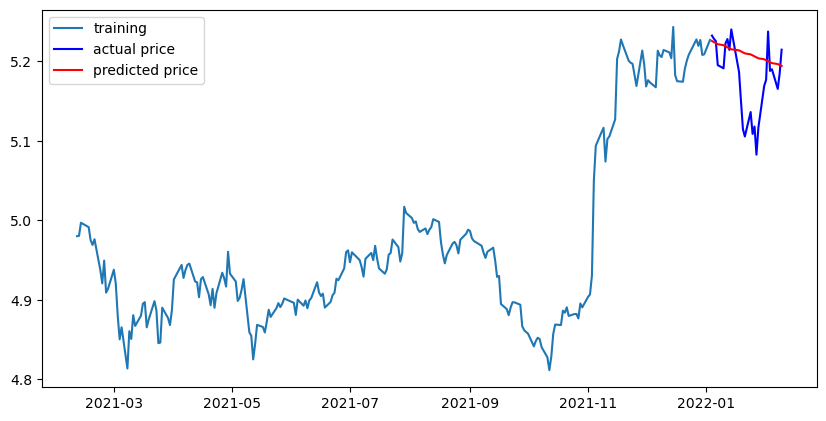

In [25]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  90.8636727790212
MAE:  7.098084533545114
RMSE:  9.532243848067527
MAPE: 4.16%


- p=1, d=0, q=0 => MAPE : 4.16%

- `p=1`, `d=1`, `q=0` 로 한번 해보자.

In [27]:
# Build and Train  Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 556.180
Date:                Thu, 17 Feb 2022   AIC                          -1108.360
Time:                        20:37:36   BIC                          -1101.519
Sample:                             0   HQIC                         -1105.600
                                - 227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0007      0.053      0.014      0.989      -0.103       0.105
sigma2         0.0004   2.13e-05     19.994      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


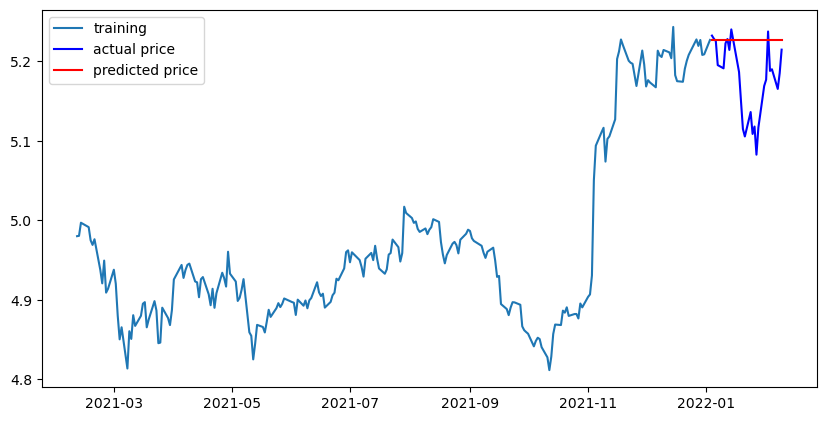

In [28]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [29]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  142.91279640640698
MAE:  9.181901210776072
RMSE:  11.954614021640639
MAPE: 5.39%


- p=1, d=1, q=0 => MAPE : 5.39%

- `p=1`, `d=2`, `q=0` 로 한번 해보자.

In [30]:
# Build and Train  Model
model = ARIMA(train_data, order=(1, 2, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 506.863
Date:                Thu, 17 Feb 2022   AIC                          -1009.726
Time:                        20:37:36   BIC                          -1002.894
Sample:                             0   HQIC                         -1006.969
                                - 227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4942      0.048    -10.256      0.000      -0.589      -0.400
sigma2         0.0006   4.61e-05     14.004      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   6.73   Jarque-

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


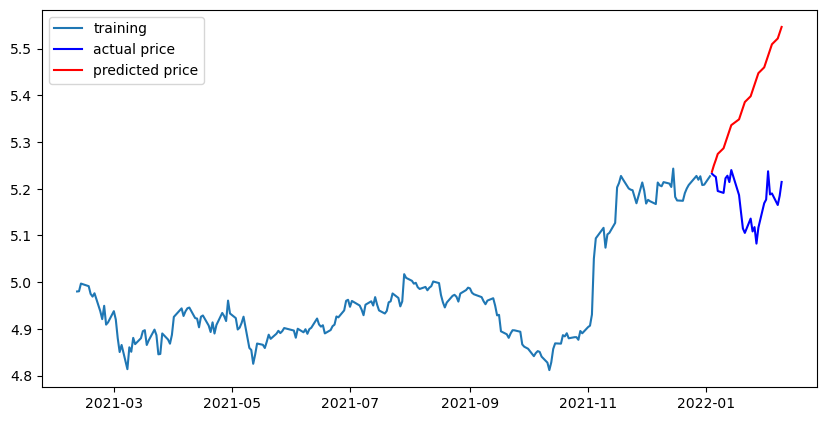

In [31]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [32]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  2440.6187572305494
MAE:  43.07832312120941
RMSE:  49.40261893088816
MAPE: 24.70%


- p=1, d=2, q=0 => MAPE : 24.7%

- `p=2`, `d=0`, `q=0` 로 한번 해보자.

In [33]:
# Build and Train  Model
model = ARIMA(train_data, order=(2, 0, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 557.094
Date:                Thu, 17 Feb 2022   AIC                          -1106.188
Time:                        20:37:37   BIC                          -1092.488
Sample:                             0   HQIC                         -1100.660
                                - 227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0520      0.255     19.778      0.000       4.551       5.553
ar.L1          0.9974      0.054     18.372      0.000       0.891       1.104
ar.L2         -0.0026      0.054     -0.048      0.9

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


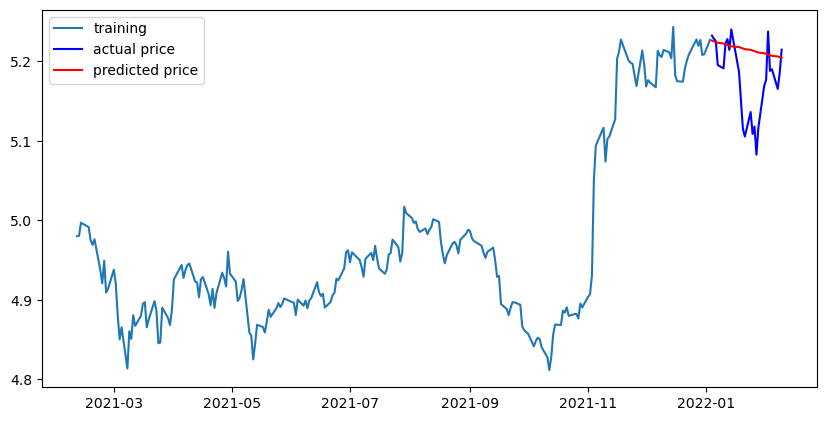

In [34]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [35]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  104.27784559534422
MAE:  7.666910378412942
RMSE:  10.211652441957874
MAPE: 4.50%


- p=2, d=0, q=0 => MAPE : 4.50%

- `p=2`, `d=0`, `q=1` 로 한번 해보자.

In [36]:
# Build and Train  Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/li

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 557.845
Date:                Thu, 17 Feb 2022   AIC                          -1105.689
Time:                        20:37:37   BIC                          -1088.565
Sample:                             0   HQIC                         -1098.779
                                - 227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0156      0.124     40.414      0.000       4.772       5.259
ar.L1          0.0161      0.116      0.138      0.890      -0.212       0.244
ar.L2          0.9601      0.111      8.634      0.0

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


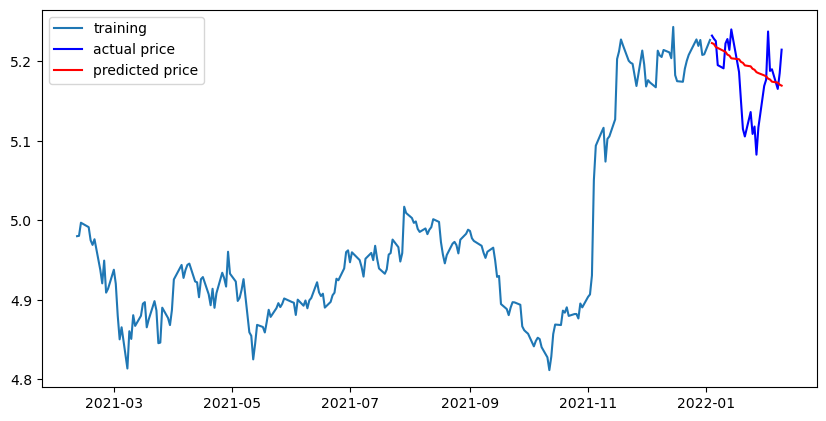

In [37]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [38]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  67.0568981876288
MAE:  6.30669163110929
RMSE:  8.188827644274166
MAPE: 3.67%


- p=2, d=0, q=1 => MAPE : 3.67%

### Summary(퀄컴)

- p=1, d=0, q=0 => MAPE : 4.16%
- p=1, d=1, q=0 => MAPE : 5.39%
- p=1, d=2, q=0 => MAPE : 24.7%
- p=2, d=0, q=0 => MAPE : 4.50%
- **p=2, d=0, q=1 => MAPE : 3.67%**

- ACF plot 확인결과 AR 모델로 판단하여 적용
- **p-value**도 충분히 안정적 시계열로 판단되기에 차분 적용을 안하는 것이 더 좋게 나왔다.
- 위 첫번째 case도 충분히 좋았으나 다섯번째 case가 더 좋았다.
- 왜 그럴까? 하고 고민해 보았지만 추정을 해보면 
- 초기 60% 부분은 과거 데이터에 회귀하고 나머지 40%는 최근 패턴을 지속할 것으로 보는 관점 때문이지 않을까 생각해 보았다.

### STEP 7 : 다른 주식 종목 예측해 보기
___

- 관심 종목을 골라 위 STEP 1~6의 과정을 반복해 보기
- 위의 CASE와 같이 다른 종목에도 적용해 보자.

### 7-1. 인텔

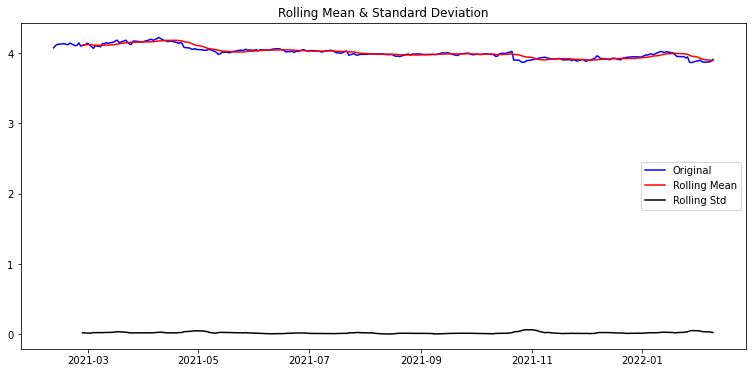

Results of Dickey-Fuller Test:
Test Statistic                  -1.637625
p-value                          0.463502
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -5.609634
p-value                          0.000001
#Lags Used                       2.000000
Number of Observations Used    220.000000
Critical Value (1%)             -3.460428
Critical Value (5%)             -2.874769
Critical Value (10%)            -2.573821
dtype: float64


/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


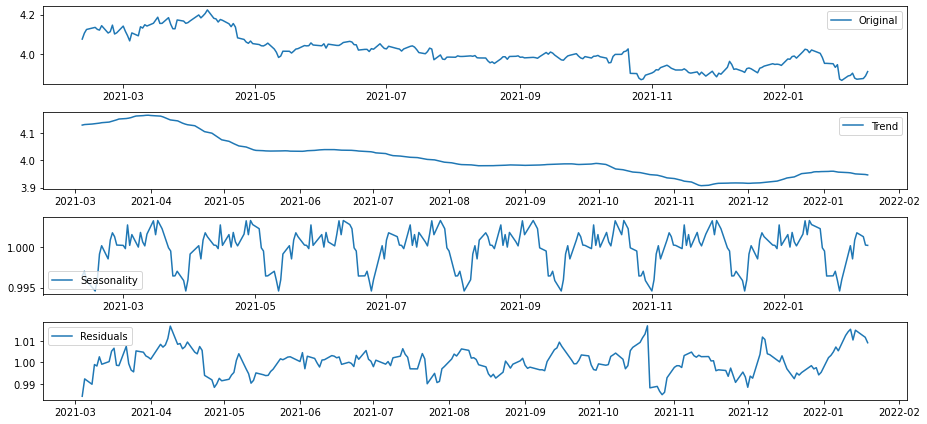

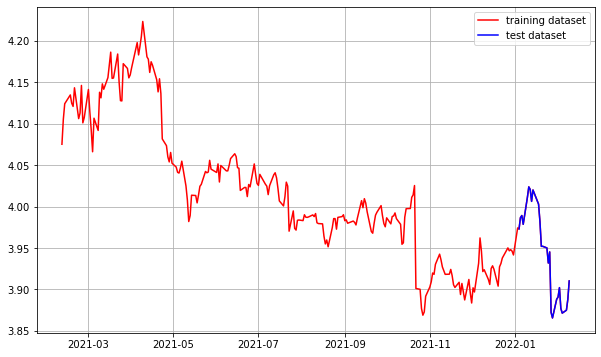

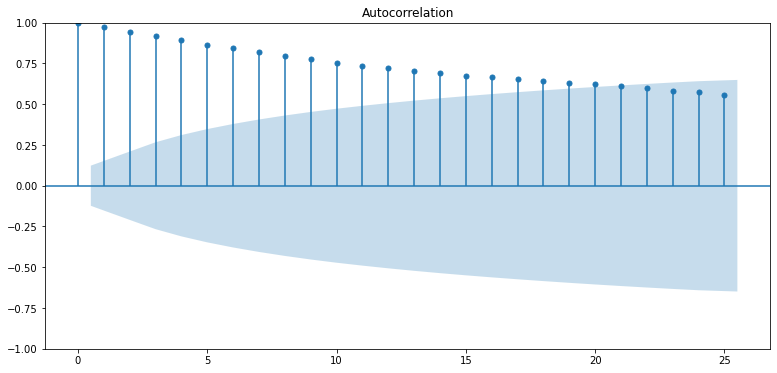

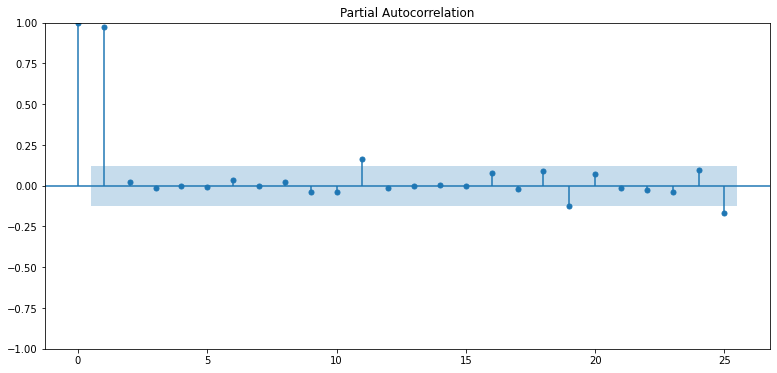

Results of Dickey-Fuller Test:
Test Statistic                -1.730331e+01
p-value                        5.611528e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.637765e+00
p-value                        1.931910e-11
#Lags Used                     1.200000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 588.311
Date:                Thu, 17 Feb 2022   AIC            

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/li

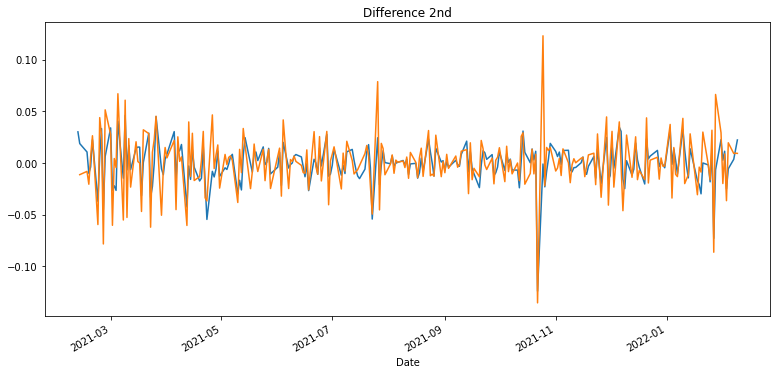

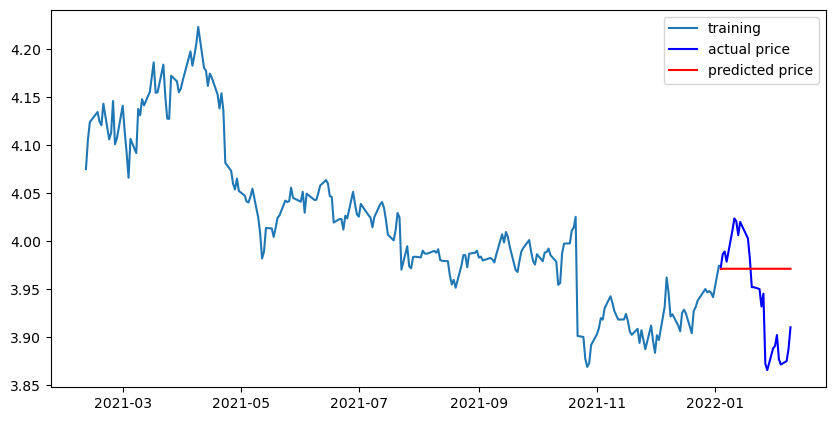

MSE:  9.431855494605573
MAE:  2.5997504307626893
RMSE:  3.0711326077858594
MAPE: 5.17%


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Time Series 생성
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/QCOM.csv'
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/INTC.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AAPL.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/MSFT.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/KO.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/PEP.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/JNJ.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

# 로그 변환
ts_log = np.log(ts)

# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Residual 안정성 확인

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

# train_data, test_data
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
# train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(ts_log, c='r', label='training dataset')  
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model_1 = ARIMA(train_data, order=(1, 1, 0))  
# model_2 = ARIMA(train_data, order=(1, 0, 0))  
# model_3 = ARIMA(train_data, order=(1, 2, 0))  
# model_4 = ARIMA(train_data, order=(2, 0, 0))  
# model_5 = ARIMA(train_data, order=(2, 0, 1))  

fitted_m = model_1.fit() 
# fitted_m = model_2.fit() 
# fitted_m = model_3.fit() 
# fitted_m = model_4.fit() 
# fitted_m = model_5.fit() 

print(fitted_m.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

### Summary(인텔)

- **p=1, d=1, q=0 => MAPE : 5.17%**
- p=1, d=0, q=0 => MAPE : 6.07%
- p=1, d=2, q=0 => MAPE : 36.4%
- p=2, d=0, q=0 => MAPE : 5.93%
- p=2, d=0, q=1 => MAPE : 5.88%

- ACF plot 확인결과 AR 모델로 판단하여 적용
- **p-value**도 안정적 시계열로 보였지만 1차 차분을 적용한 case가 더 좋게 나왔다.
- 첫번째 case가 가장 높은 MAPE 를 보여주었다.
- 전반적으로 2차 차분을 적용한 case를 제외하면 큰 차이 없이 좋은 결과를 보여주었다.


### 7-2. 애플

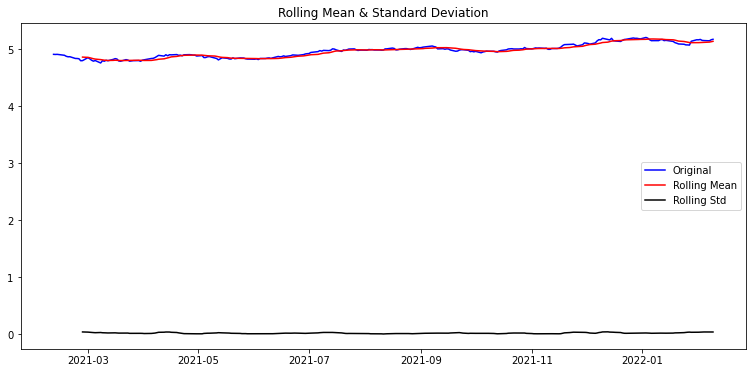

Results of Dickey-Fuller Test:
Test Statistic                  -0.410001
p-value                          0.908416
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -4.747775
p-value                          0.000068
#Lags Used                       6.000000
Number of Observations Used    216.000000
Critical Value (1%)             -3.460992
Critical Value (5%)             -2.875016
Critical Value (10%)            -2.573952
dtype: float64


/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


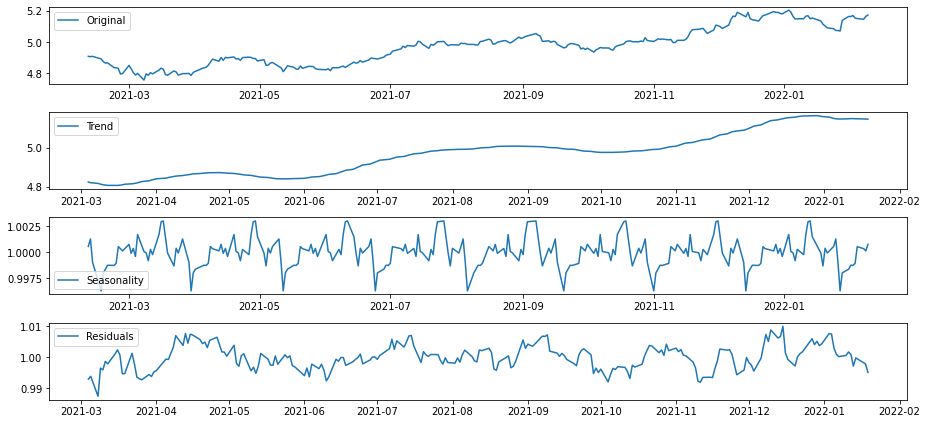

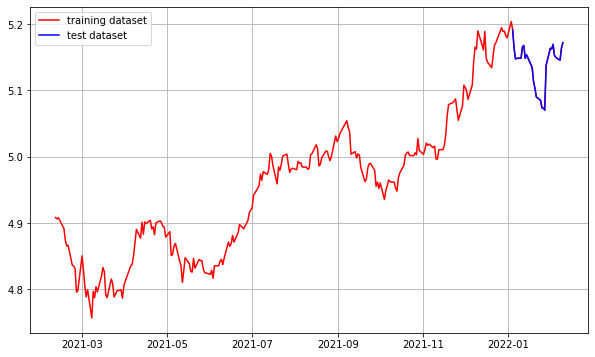

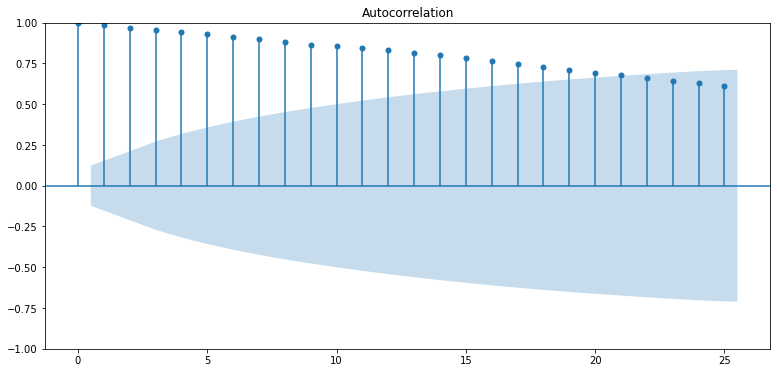

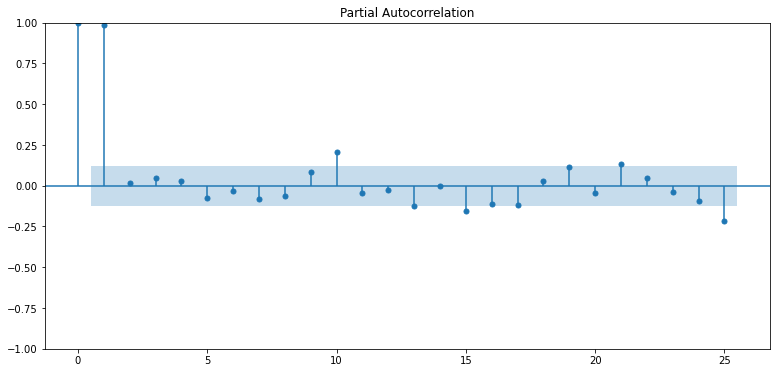

Results of Dickey-Fuller Test:
Test Statistic                -9.969701e+00
p-value                        2.257472e-17
#Lags Used                     2.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.667778e+00
p-value                        1.623806e-11
#Lags Used                     1.200000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 626.711
Date:                Thu, 17 Feb 2022   AIC            

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/li

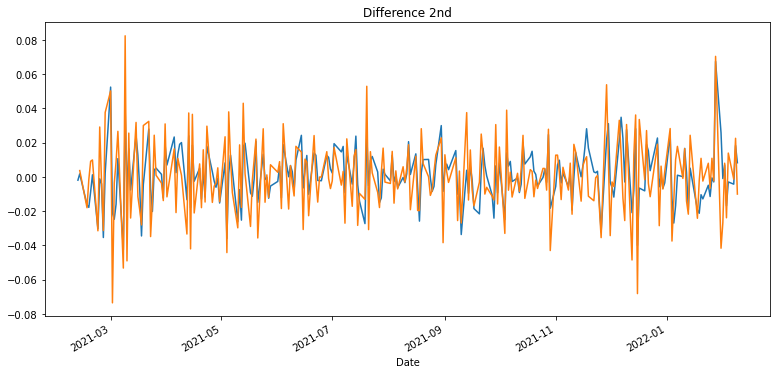

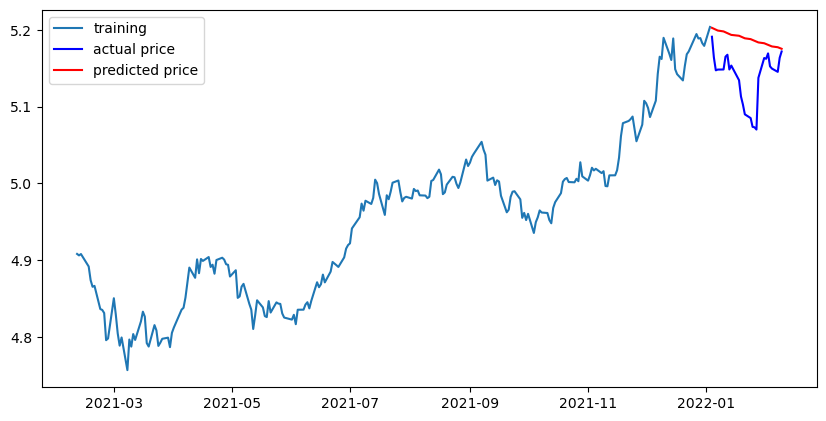

MSE:  109.68459909002516
MAE:  8.747425975966676
RMSE:  10.473041539592266
MAPE: 5.25%


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Time Series 생성
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/QCOM.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/INTC.csv'
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AAPL.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/MSFT.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/KO.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/PEP.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/JNJ.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

# 로그 변환
ts_log = np.log(ts)

# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Residual 안정성 확인

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

# train_data, test_data
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
# train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(ts_log, c='r', label='training dataset')  
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
# model_1 = ARIMA(train_data, order=(1, 1, 0))  
model_2 = ARIMA(train_data, order=(1, 0, 0))  
# model_3 = ARIMA(train_data, order=(1, 2, 0))  
# model_4 = ARIMA(train_data, order=(2, 0, 0))  
# model_5 = ARIMA(train_data, order=(2, 0, 1))  

# fitted_m = model_1.fit() 
fitted_m = model_2.fit() 
# fitted_m = model_3.fit() 
# fitted_m = model_4.fit() 
# fitted_m = model_5.fit() 

print(fitted_m.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

### Summary(애플)

- p=1, d=1, q=0 => MAPE : 6.69%
- **p=1, d=0, q=0 => MAPE : 5.25%**
- p=1, d=2, q=0 => MAPE : 31.27%
- p=2, d=0, q=0 => MAPE : 5.32%
- p=2, d=0, q=1 => MAPE : 5.33%

- 선행 case와 동일한 AR 모델로 판단하여 적용
- 그래프가 전반적으로 우상향하는 모양이기에 그런지 차분을 적용하지 않는 case가 전반적으로 좋은 모습을 보였다.
- 바로 위 인텔은 우하향하는 그래프이고 애플은 우상향 그래프이지만 MAPE는 5% 대로 나오면서 비슷한 모습을 보여주었다.
- 어느 종목이 더 좋은 모습을 보이는 것인지 판단하긴 어렵지만
- 방향성이 달라도 MAPE는 비슷한 결과를 보일 수 있다는 것을 알 수 있었다.


### 7-3. 마이크로소프트

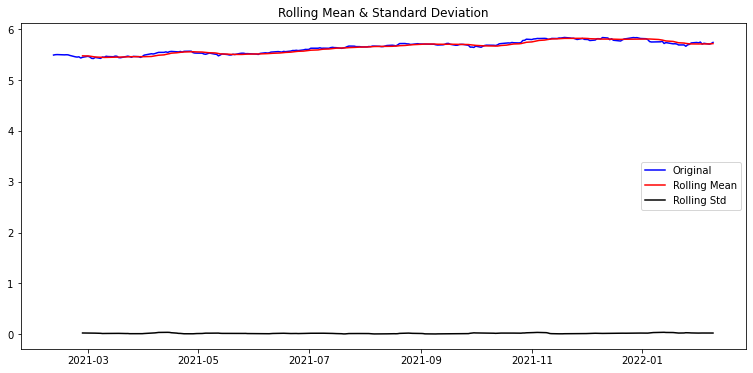

Results of Dickey-Fuller Test:
Test Statistic                  -1.161048
p-value                          0.690124
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -5.516229
p-value                          0.000002
#Lags Used                       0.000000
Number of Observations Used    222.000000
Critical Value (1%)             -3.460154
Critical Value (5%)             -2.874649
Critical Value (10%)            -2.573757
dtype: float64


/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


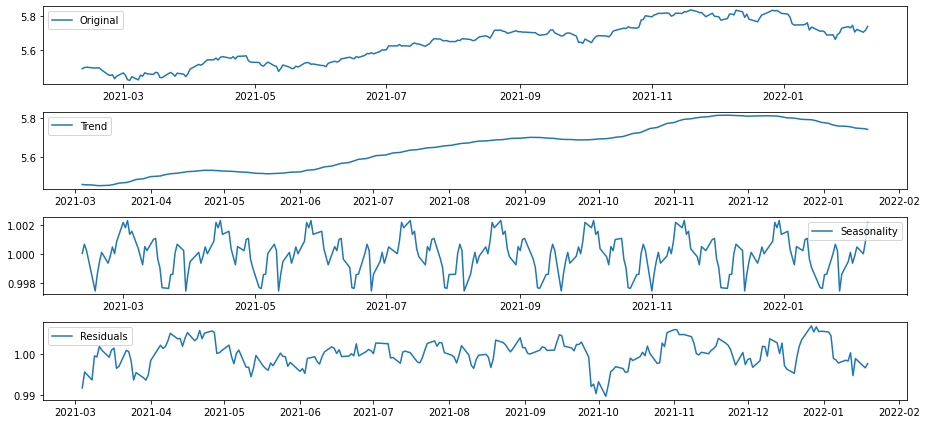

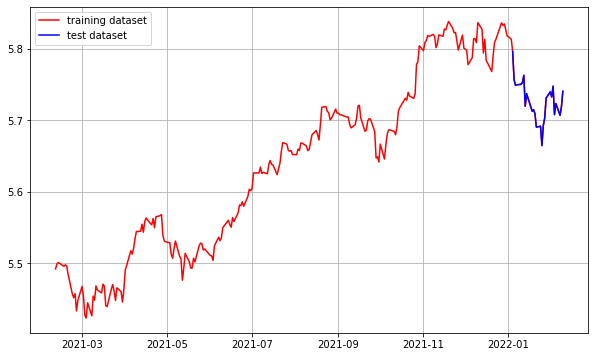

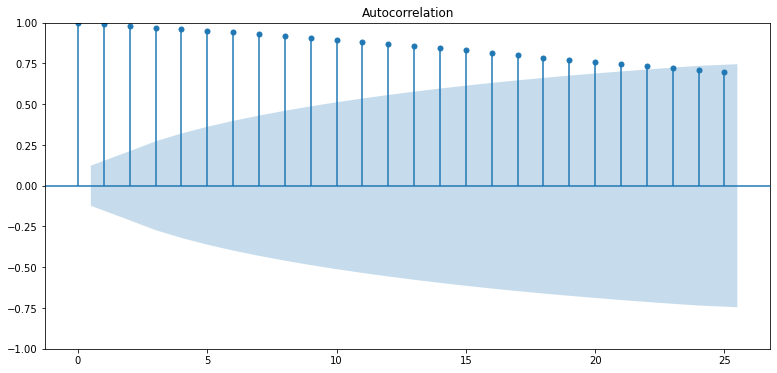

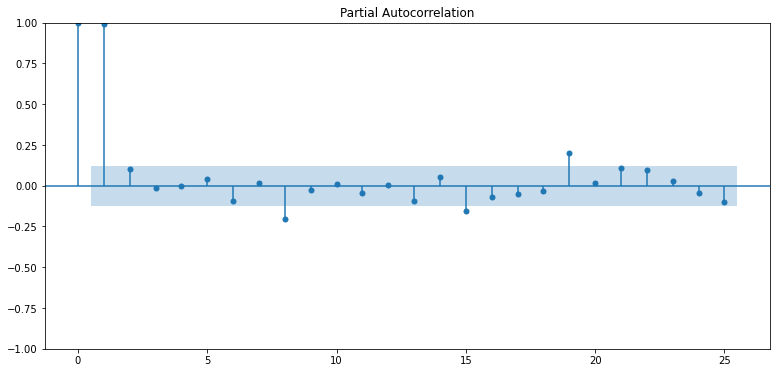

Results of Dickey-Fuller Test:
Test Statistic                -1.659486e+01
p-value                        1.785608e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.319944e+00
p-value                        1.201500e-10
#Lags Used                     1.200000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 611.353
Date:                Thu, 17 Feb 2022   AIC            

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/li

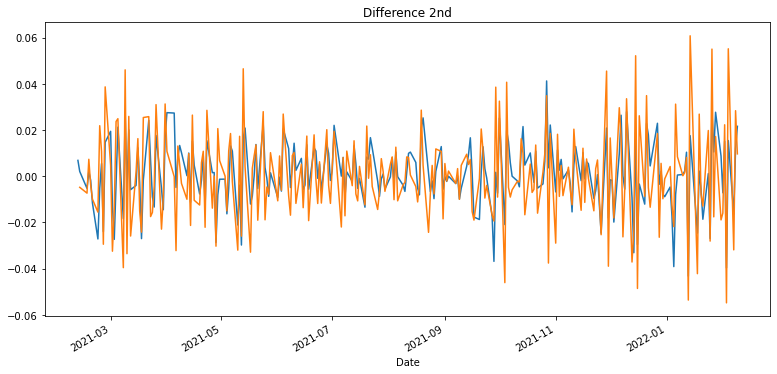

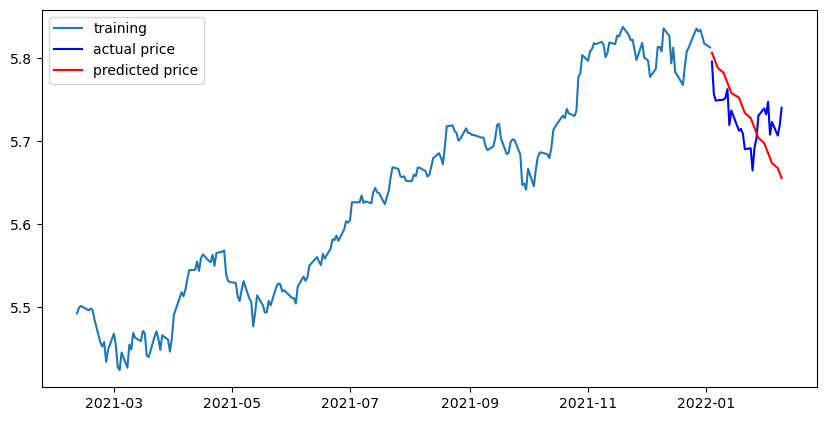

MSE:  156.437961358308
MAE:  11.4306118836782
RMSE:  12.507516194605067
MAPE: 3.73%


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Time Series 생성
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/QCOM.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/INTC.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AAPL.csv'
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/MSFT.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/KO.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/PEP.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/JNJ.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

# 로그 변환
ts_log = np.log(ts)

# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Residual 안정성 확인

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

# train_data, test_data
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
# train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(ts_log, c='r', label='training dataset')  
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
# model_1 = ARIMA(train_data, order=(1, 1, 0))  
# model_2 = ARIMA(train_data, order=(1, 0, 0))  
model_3 = ARIMA(train_data, order=(1, 2, 0))  
# model_4 = ARIMA(train_data, order=(2, 0, 0))  
# model_5 = ARIMA(train_data, order=(2, 0, 1))  

# fitted_m = model_1.fit() 
# fitted_m = model_2.fit() 
fitted_m = model_3.fit() 
# fitted_m = model_4.fit() 
# fitted_m = model_5.fit() 

print(fitted_m.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

### Summary(마이크로소프트)

- p=1, d=1, q=0 => MAPE : 9.07%
- p=1, d=0, q=0 => MAPE : 8.12%
- **p=1, d=2, q=0 => MAPE : 3.73%**
- p=2, d=0, q=0 => MAPE : 8.27%
- p=2, d=0, q=1 => MAPE : 8.30%

- 선행 case와 동일한 AR 모델로 판단하여 적용
- 그래프가 전반적으로 우상향하다가 급격하게 우하향으로 전환되는 모습을 보이고 있어서 그런지
- 2차 차분을 적용한 case 가 가장 좋은 결과를 보여주었다.
- 변동성이 급격하게 변하는 모습일 경우에는 차분 적용을 하는 것이 필요하겠다고 생각했다.


### 7-4. 코카콜라

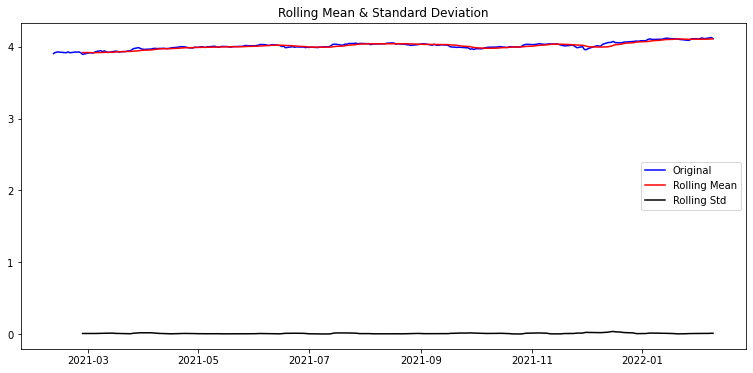

Results of Dickey-Fuller Test:
Test Statistic                  -1.526290
p-value                          0.520468
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -3.968589
p-value                          0.001584
#Lags Used                      15.000000
Number of Observations Used    207.000000
Critical Value (1%)             -3.462342
Critical Value (5%)             -2.875606
Critical Value (10%)            -2.574267
dtype: float64


/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


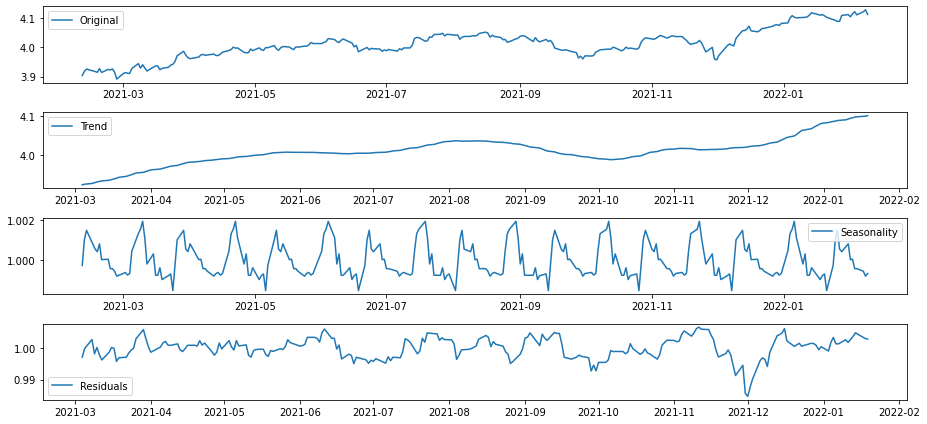

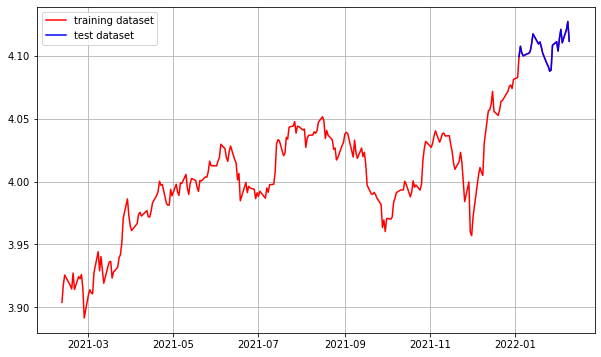

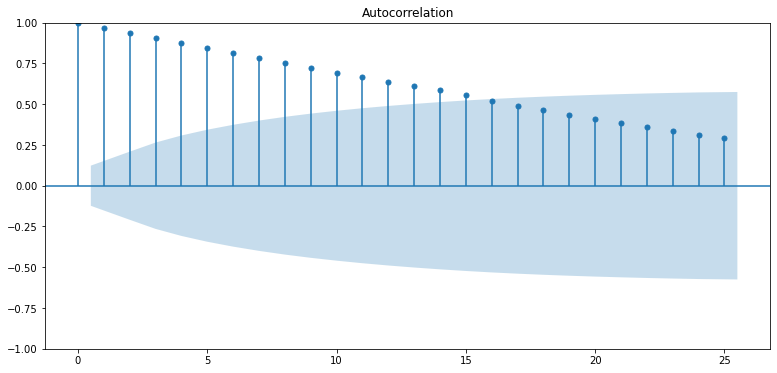

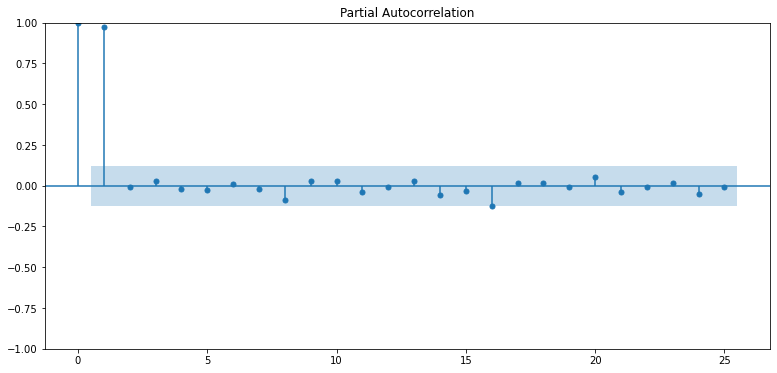

Results of Dickey-Fuller Test:
Test Statistic                -1.625996e+01
p-value                        3.574063e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.829475e+00
p-value                        6.349666e-12
#Lags Used                     1.300000e+01
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 742.874
Date:                Thu, 17 Feb 2022   AIC            

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/li

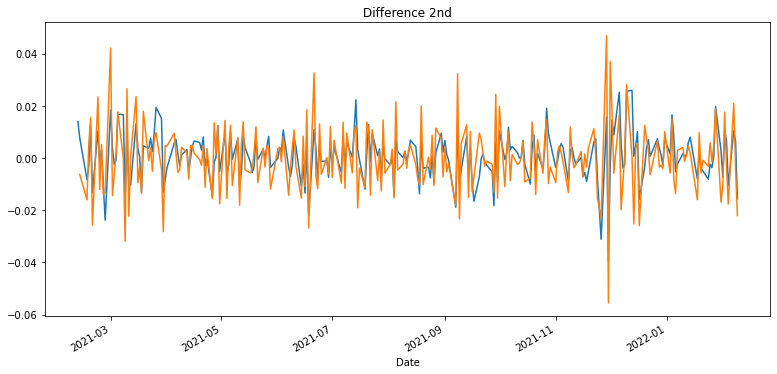

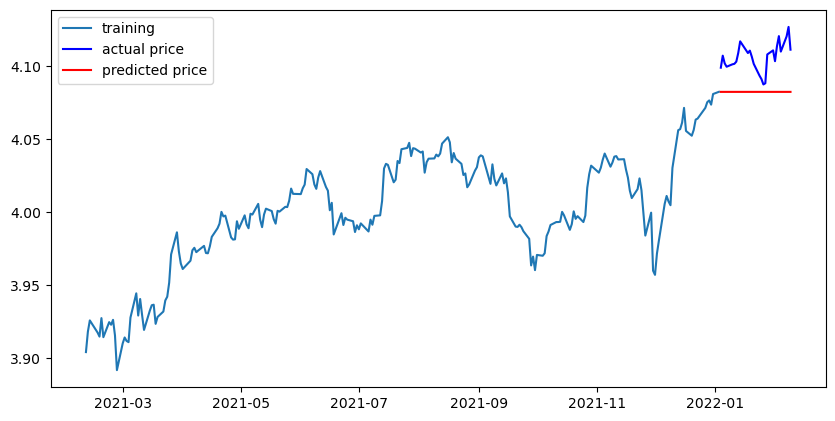

MSE:  2.337488863524538
MAE:  1.4146092873074159
RMSE:  1.5288848431208082
MAPE: 2.32%


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Time Series 생성
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/QCOM.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/INTC.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AAPL.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/MSFT.csv'
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/KO.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/PEP.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/JNJ.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

# 로그 변환
ts_log = np.log(ts)

# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Residual 안정성 확인

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

# train_data, test_data
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
# train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(ts_log, c='r', label='training dataset')  
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model_1 = ARIMA(train_data, order=(1, 1, 0))  
# model_2 = ARIMA(train_data, order=(1, 0, 0))  
# model_3 = ARIMA(train_data, order=(1, 2, 0))  
# model_4 = ARIMA(train_data, order=(2, 0, 0))  
# model_5 = ARIMA(train_data, order=(2, 0, 1))  

fitted_m = model_1.fit() 
# fitted_m = model_2.fit() 
# fitted_m = model_3.fit() 
# fitted_m = model_4.fit() 
# fitted_m = model_5.fit() 

print(fitted_m.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

### Summary(코카콜라)

- **p=1, d=1, q=0 => MAPE : 2.32%**
- p=1, d=0, q=0 => MAPE : 4.84%
- p=1, d=2, q=0 => MAPE : 2.82%
- p=2, d=0, q=0 => MAPE : 4.58%
- p=2, d=0, q=1 => MAPE : 3.43%

- 선행 case와 동일한 AR 모델로 판단하여 적용
- 변동폭이 커서 그런지 차분 적용을 했을때 MAPE가 2% 대로 좋은 결과를 보여주었다.
- 변동성이 클 경우 차분 적용이 필요하다고 생각되어지는 현상이다.


### 7-5. 펩시

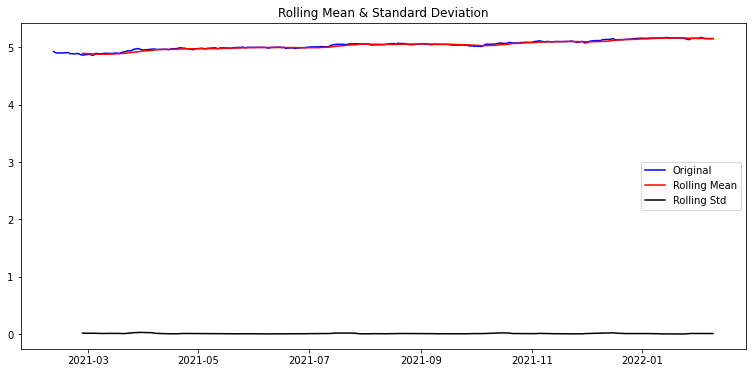

Results of Dickey-Fuller Test:
Test Statistic                  -0.979224
p-value                          0.760766
#Lags Used                       1.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -5.236328
p-value                          0.000007
#Lags Used                       5.000000
Number of Observations Used    217.000000
Critical Value (1%)             -3.460849
Critical Value (5%)             -2.874953
Critical Value (10%)            -2.573919
dtype: float64


/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


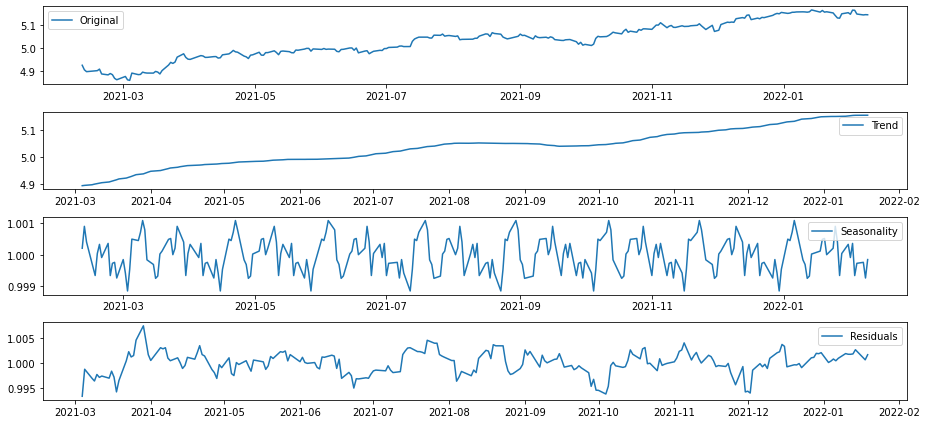

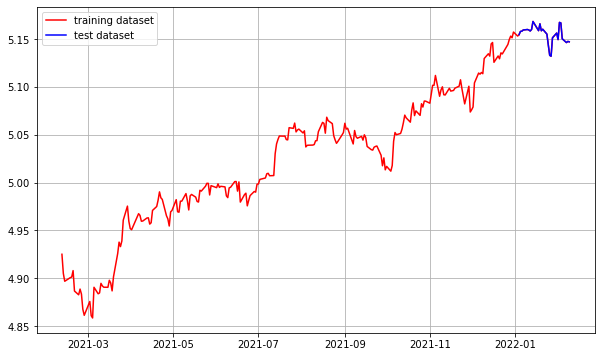

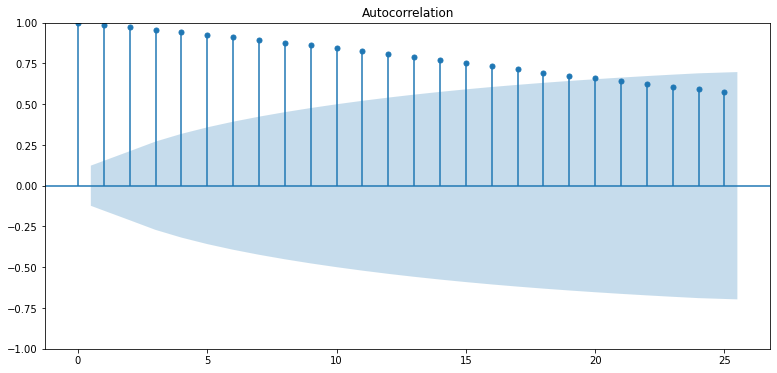

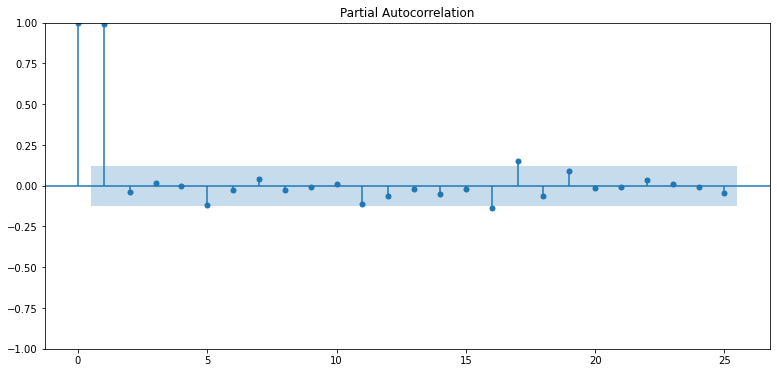

Results of Dickey-Fuller Test:
Test Statistic                -1.719932e+01
p-value                        6.475206e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.817005e+00
p-value                        6.827625e-12
#Lags Used                     1.300000e+01
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 745.238
Date:                Thu, 17 Feb 2022   AIC            

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/li

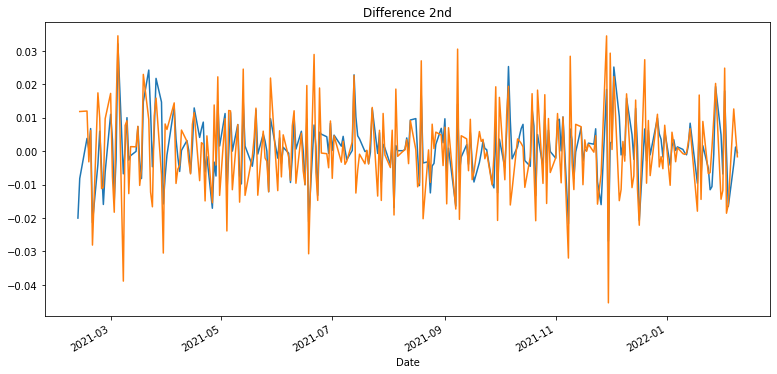

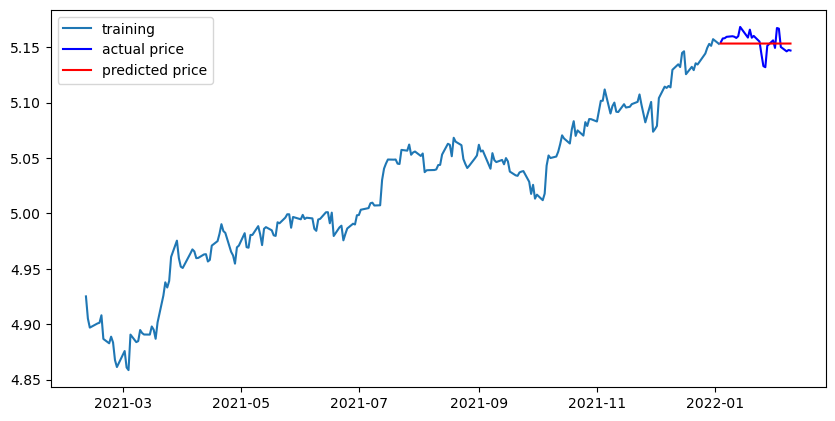

MSE:  2.5594588929602398
MAE:  1.3181805260226702
RMSE:  1.5998308951136804
MAPE: 0.76%


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Time Series 생성
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/QCOM.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/INTC.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AAPL.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/MSFT.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/KO.csv'
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/PEP.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/JNJ.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

# 로그 변환
ts_log = np.log(ts)

# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Residual 안정성 확인

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

# train_data, test_data
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
# train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(ts_log, c='r', label='training dataset')  
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model_1 = ARIMA(train_data, order=(1, 1, 0))  
# model_2 = ARIMA(train_data, order=(1, 0, 0))  
# model_3 = ARIMA(train_data, order=(1, 2, 0))  
# model_4 = ARIMA(train_data, order=(2, 0, 0))  
# model_5 = ARIMA(train_data, order=(2, 0, 1))  

fitted_m = model_1.fit() 
# fitted_m = model_2.fit() 
# fitted_m = model_3.fit() 
# fitted_m = model_4.fit() 
# fitted_m = model_5.fit() 

print(fitted_m.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

### Summary(펩시)

- **p=1, d=1, q=0 => MAPE : 0.76%**
- p=1, d=0, q=0 => MAPE : 1.08%
- p=1, d=2, q=0 => MAPE : 1.28%
- p=2, d=0, q=0 => MAPE : 1.14%
- p=2, d=0, q=1 => MAPE : 1.19%

- 선행 case와 동일한 AR 모델로 판단하여 적용
- 차트만 봐도 상당히 안정적이란 생각이 들었는데
- 데이터도 그런 생각과 동일한 결과를 보여주며 상당히 안정적이다.

### 7-6. 존슨앤존슨

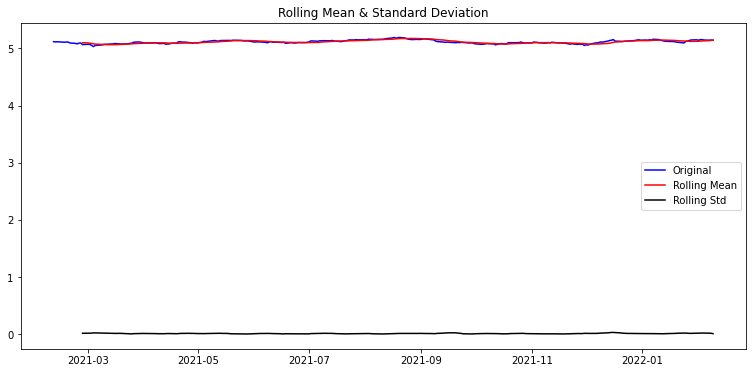

Results of Dickey-Fuller Test:
Test Statistic                  -2.387747
p-value                          0.145225
#Lags Used                       2.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -5.917664e+00
p-value                        2.550091e-07
#Lags Used                     3.000000e+00
Number of Observations Used    2.190000e+02
Critical Value (1%)           -3.460567e+00
Critical Value (5%)           -2.874830e+00
Critical Value (10%)          -2.573853e+00
dtype: float64


/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


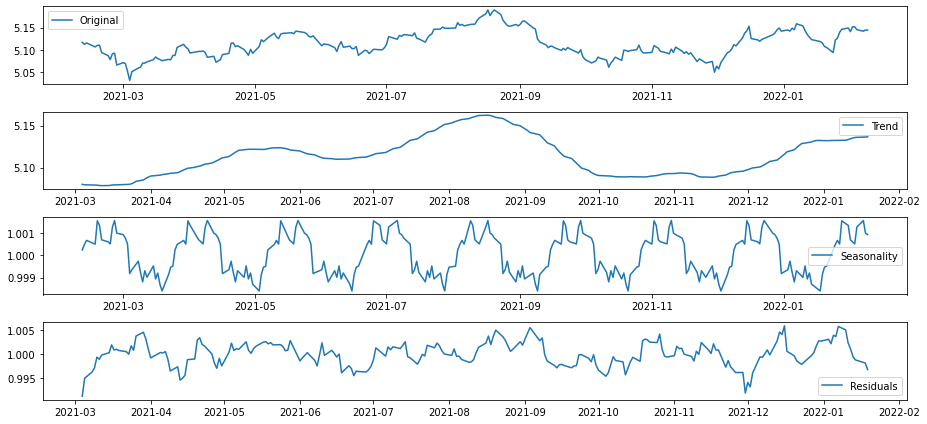

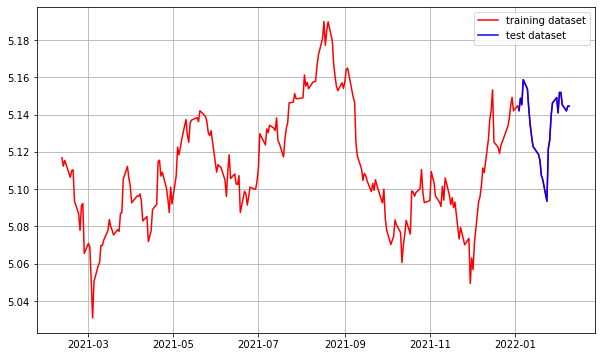

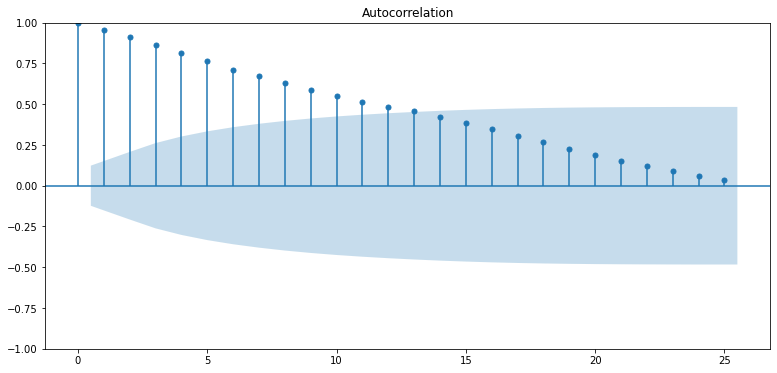

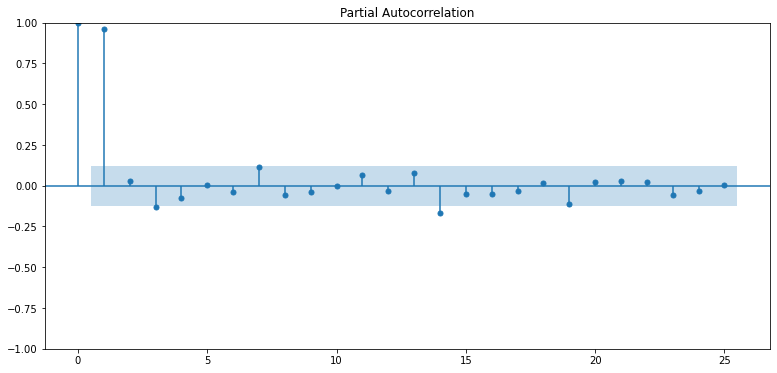

Results of Dickey-Fuller Test:
Test Statistic                -1.026727e+01
p-value                        4.088101e-18
#Lags Used                     1.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.299133e+00
p-value                        4.063086e-13
#Lags Used                     1.100000e+01
Number of Observations Used    2.390000e+02
Critical Value (1%)           -3.458011e+00
Critical Value (5%)           -2.873710e+00
Critical Value (10%)          -2.573256e+00
dtype: float64
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 750.783
Date:                Thu, 17 Feb 2022   AIC            

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/li

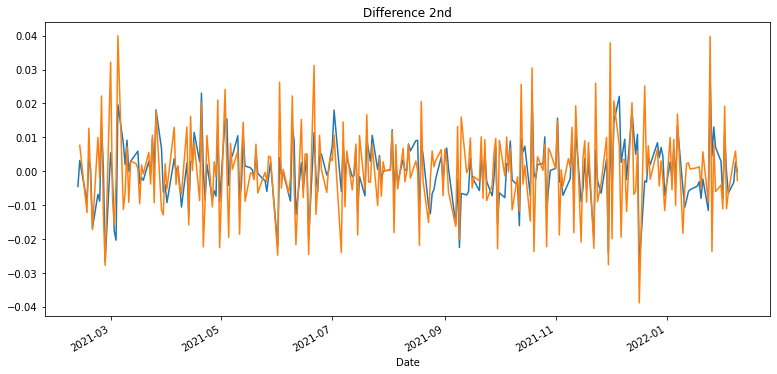

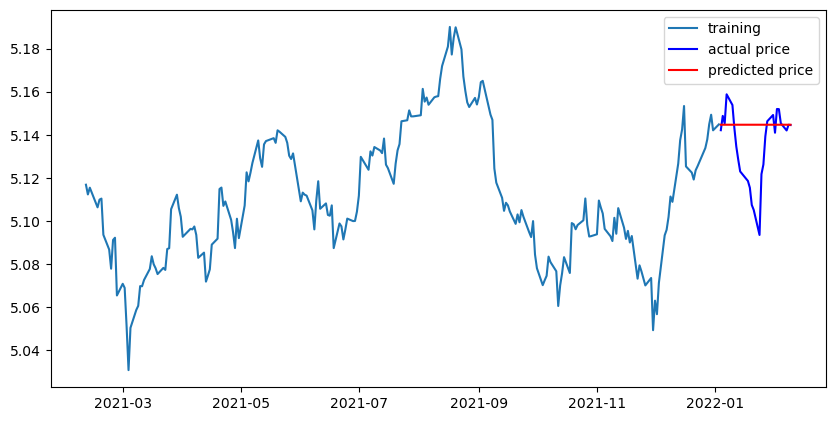

MSE:  10.14177233861593
MAE:  2.2005740098826325
RMSE:  3.1846149435396316
MAPE: 1.32%


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Time Series 생성
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/QCOM.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/INTC.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AAPL.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/MSFT.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/KO.csv'
# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/PEP.csv'
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/JNJ.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

# 로그 변환
ts_log = np.log(ts)

# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Residual 안정성 확인

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

# train_data, test_data
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
# train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(ts_log, c='r', label='training dataset')  
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# 차분 안정성 확인 -> d 구하기
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model_1 = ARIMA(train_data, order=(1, 1, 0))
# model_2 = ARIMA(train_data, order=(1, 0, 0))  
# model_3 = ARIMA(train_data, order=(1, 2, 0))  
# model_4 = ARIMA(train_data, order=(2, 0, 0))  
# model_5 = ARIMA(train_data, order=(2, 0, 1))  

fitted_m = model_1.fit() 
# fitted_m = model_2.fit() 
# fitted_m = model_3.fit() 
# fitted_m = model_4.fit() 
# fitted_m = model_5.fit() 

print(fitted_m.summary())

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

### Summary(존슨앤존슨)

- **p=1, d=1, q=0 => MAPE : 1.32%**
- p=1, d=0, q=0 => MAPE : 1.52%
- p=1, d=2, q=0 => MAPE : 1.60%
- p=2, d=0, q=0 => MAPE : 1.51%
- p=2, d=0, q=1 => MAPE : 1.54%

- 선행 case와 동일한 AR 모델로 판단하여 적용
- 변동성은 좀 있지만 서서히 우상향하는 모습을 보여주고 있어서 그런지
- 위 펩시 만큼은 아니지만 어떤 모델을 적용하여도 안정적인 결과를 보여주었다.
- 이것은 좋은 모습으로 우상향하는 모습이든 변화는 있지만 서서히 우상향하는 모습의 그래프는
- 크게 차이나는 모습으로 나타나지는 않았다.
- 그만큼 "안정적 시계열 일수록 예측도 가능할 수 있다" 정도로 해석될 것 같다.

## 회고

### 어려웠던 점

- 통계적 지식이 없어서 진입 장벽이 높았다.
- 검색을 통해 습득을 하고 싶었지만 분명한 한계는 느껴졌다.
- ADT TEST, ACF, PACF, SARIMA results 등 표현되는 그래프나 수치적 TABLE에 대한 해석이 어려웠다.
- 이 수치들이 나타내고 있는 의미, 연관성 등을 이해하기 힘들었다.
- 특히 ARIMA 모델과 모수에 대한 이해와 선정 방법 등 짧은 시간에 이해하긴 매우 어렵다고 느꼈다.


### 시도했던 것

- LMS 제출 하루 전까지도 이해하기 힘들었던 부분이 많았다.
- 제출 당일에 같은 조원들에게 문의하고 서로 토론 하면서 조금씩 이해되기 시작했다.(미미하다 판단되지만......)
- 사전에 관심있는 종목들은 다운받아 놓았기에 ARIMA 모델의 모수들을 다양하게 적용해 보았다.


### 최종정리

- ARIMA 모수들에 대한 더욱 다양한 시도가 필요했다고 생각된다.
- 특히 p, q 값을 LMS에서 p=14 라는 적용을 했었는데 이것이 아직도 정확하게 무슨 의미인지 이해하기 어렵다.
- 아래와 같은 내용을 아래 링크에서 참고하게 되었지만 명확한 이해를 하기가 어려웠다.(번역기 사용)
    - P=지연 기간 `예:(P=3인 경우 계산의 자기회귀 부분에서 시계열의 이전 세 기간을 사용합니다.)` 
    - P는 시리즈를 예측하기 위해 피팅되는 선을 조정하는 데 도움이 됩니다.
    - [시계열 예측 - ARIMA 모델](https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06)
    
    
- 실제 P 값을 상향하며 적용했을시에 예측으로 피팅되는 선이 좀 더 자연스러워졌었다.
- 잦은 문의에도 친절히 설명해주시고 공유해주신 모든 분들께 **"감사합니다.^_^*"** 말씀 전합니다.
- 아래 참고했던 링크를 남기며 본 프로젝트를 마무리한다.


### 참고 링크

- [ARIMA 총정리](https://blog.naver.com/nywoo19/221600142327)
- [SARMAX](https://sosoeasy.tistory.com/397)
- [20회 ADP 실기 python 통계분석(시계열 ARIMA, 잔차분석)](https://bluemumin.github.io/adp/2021/03/10/ADP-20%ED%9A%8C-ADP-%EC%8B%A4%EA%B8%B0-python-%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D(Arima,-%EC%9E%94%EC%B0%A8%EB%B6%84%EC%84%9D)/)
- [Time series Forecasting — ARIMA models](https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06)
